In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
df.shape

(41188, 21)

In [6]:
df.isna().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
categorical_cols = [c for c in df.columns if c!='y' and df[c].dtype == 'object']

In [8]:
for c in categorical_cols:
  print(f"column: \n", df[c].value_counts(),"\n")

column: 
 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

column: 
 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

column: 
 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

column: 
 default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

column: 
 housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 

column: 
 loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int6

In [9]:
df['y'].value_counts() #–∑–Ω–∞—á–Ω–æ –ø–µ—Ä–µ–≤–∞–∂–∞—î –æ–¥–∏–Ω –∫–ª–∞—Å

y
no     36548
yes     4640
Name: count, dtype: int64

# EDA

### –û–ø–∏—Å —á–∏—Å–ª–æ–≤–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö

In [10]:
numeric_cols = [c for c in df.columns if df[c].dtype != 'object' and c!='duration']

In [11]:
numeric_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

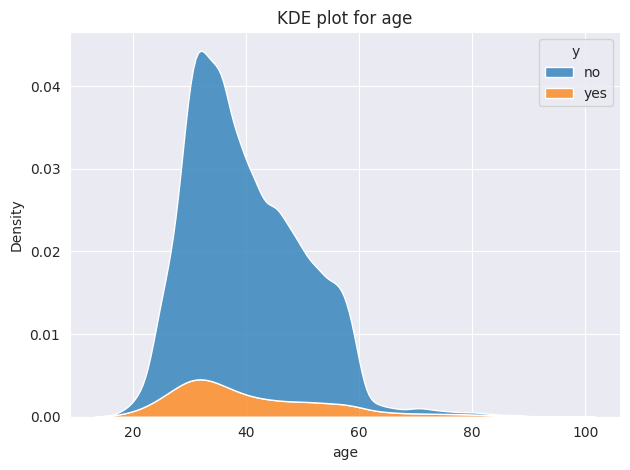

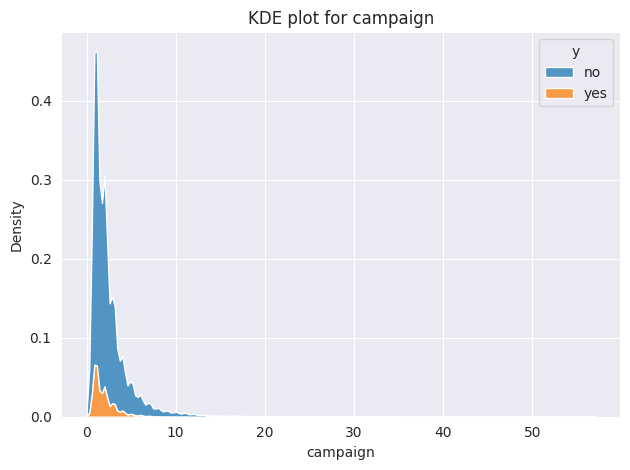

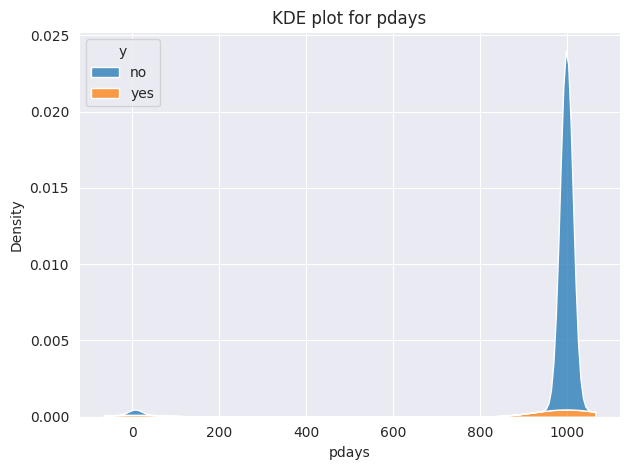

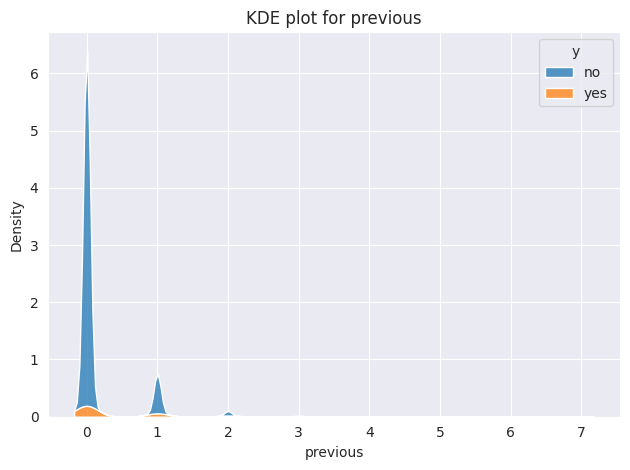

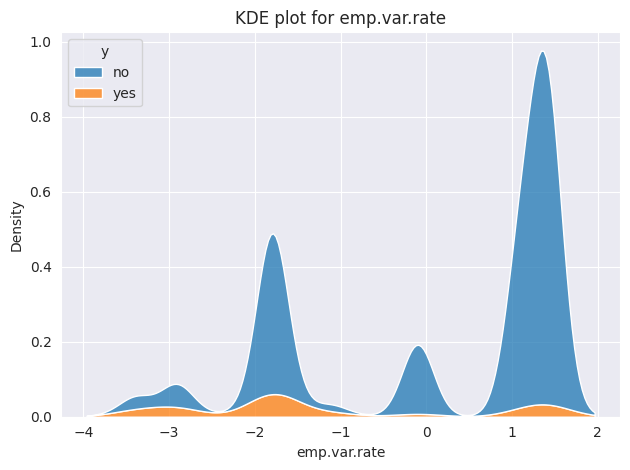

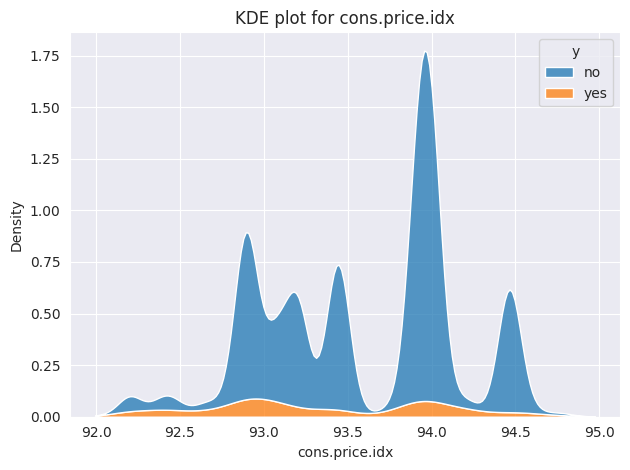

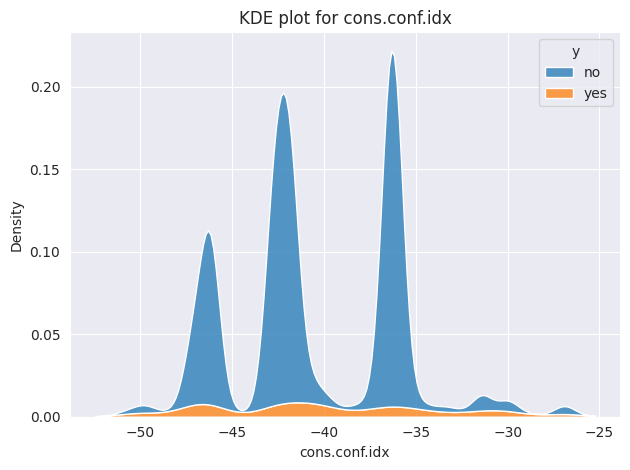

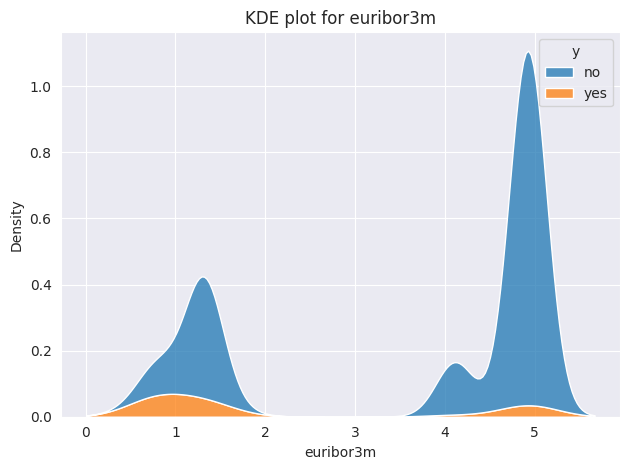

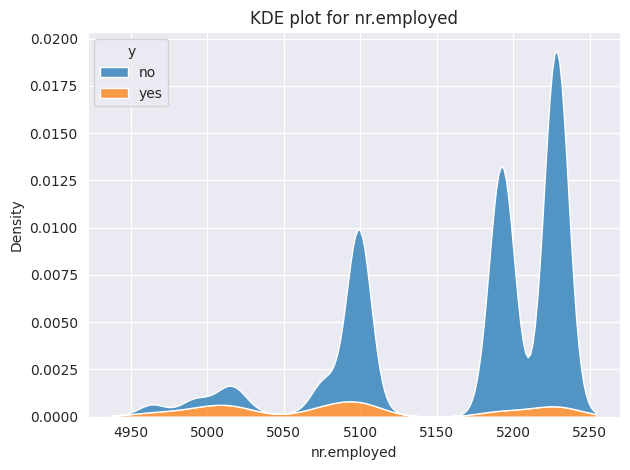

In [12]:
for c in numeric_cols:
  sns.kdeplot(data=df,x=c,hue='y',multiple="stack")
  plt.title(f'KDE plot for {c}')
  plt.tight_layout()
  plt.show()



*   –ó–º—ñ–Ω–Ω–∞ `cons.conf.idx`,`campaign`,`previous` –º–∞—î –≤–∏–∫–∏–¥–∏,
*   –ó–º—ñ–Ω–Ω–∞ `pdays` –º–∞—î –¥—É–∂–µ —Ü—ñ–∫–∞–≤–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª, –æ—Å–∫—ñ–ª—å–∫–∏ —á–∏—Å–ª–æ 999 —î —Å—Ç–∞–ª–∏–º –ø—Ä–∏ —Å–∏—Ç—É–∞—Ü—ñ—ó "–Ω–µ –∫–æ–Ω—Ç–∞–∫—Ç—É–≤–∞–ª–∏" - —î —Å–µ–Ω—Å –ø–µ—Ä–µ—Ç–≤–æ—Ä–∏—Ç–∏ –Ω–∞ –±—ñ–Ω–∞—Ä–Ω—É –∑–º—ñ–Ω–Ω—É –±—É–≤ –∫–æ–Ω—Ç–∞–∫—Ç —á–∏ –Ω—ñ
* –¢–∞–∫–æ–∂ –∑–º—ñ–Ω–Ω—ñ `campaign` —ñ `previous` –ø–æ–∫–∞–∑—É—é—Ç—å, —â–æ —á–∏–º–±—ñ–ª—å—à–µ –∫–æ–Ω—Ç–∞–∫—Ç—ñ–≤ –∑ –ª—é–¥–∏–Ω–æ—é —Ç–∏–º –º–µ–Ω—à–∞ –π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –Ω–∞ –ø—ñ–¥–ø–∏—Å–∞–Ω–Ω—è –¥–µ–ø–æ–∑–∏—Ç—É



–∑–º—ñ–Ω–Ω–∞ `duration` –¥–∞—î –ø–æ —Å—É—Ç—ñ –≤–∂–µ –≤—ñ–¥–ø–æ–≤—ñ–¥—å –Ω–∞ –∑–∞–ø–∏—Ç–∞–Ω–Ω—è, —Ç–æ–º—É –≤–æ–Ω–∞ —Ç—Ä–æ—Ö–∏ –Ω–µ–≤–¥–∞–ª–∞ –¥–ª—è –Ω–∞–≤—á–∞–Ω–Ω—è –º–æ–¥–µ–ª–µ–π

### –û–ø–∏—Å –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö

In [13]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

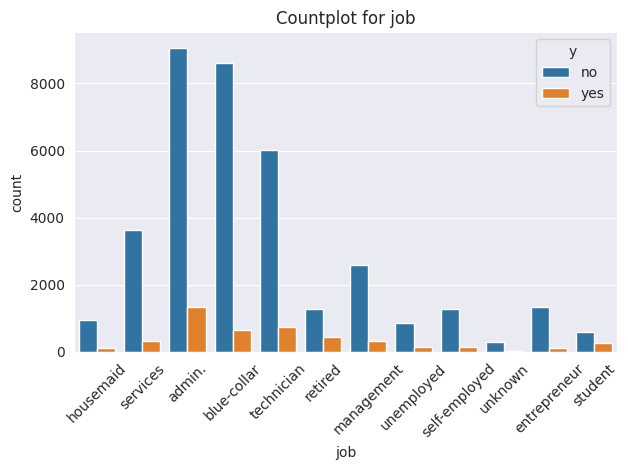

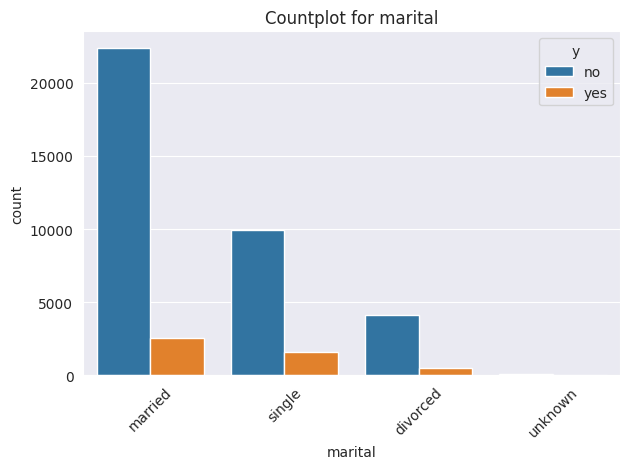

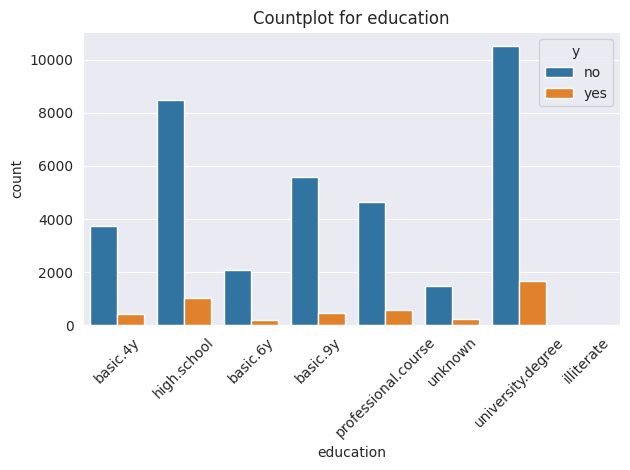

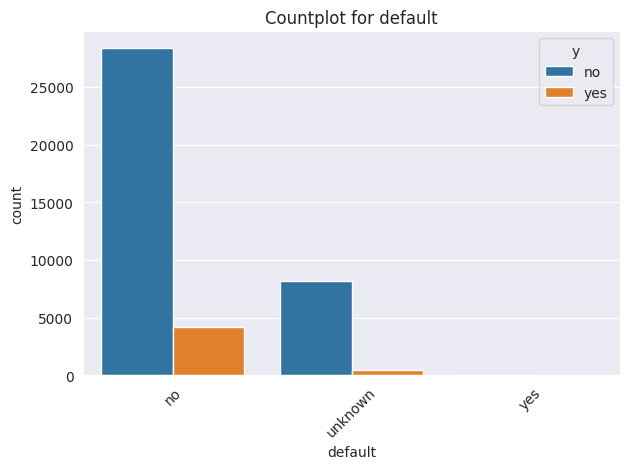

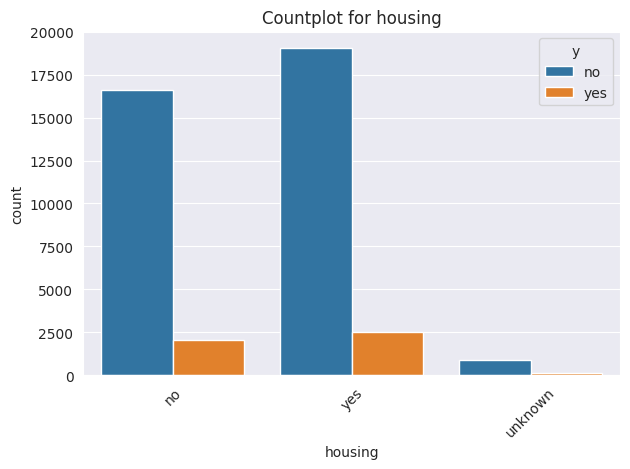

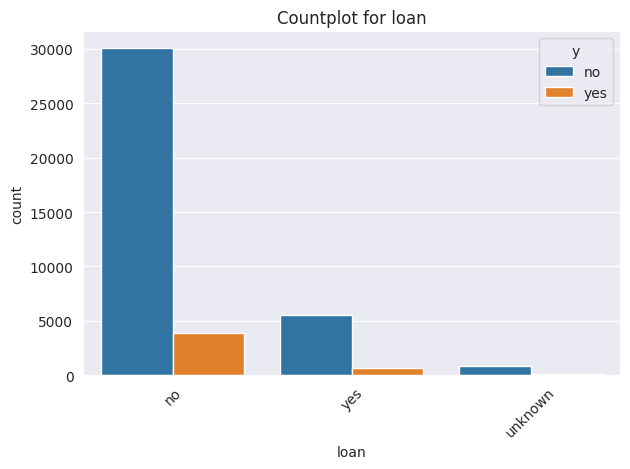

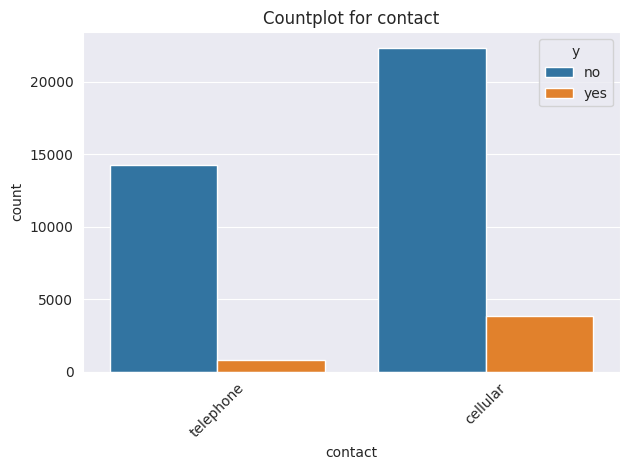

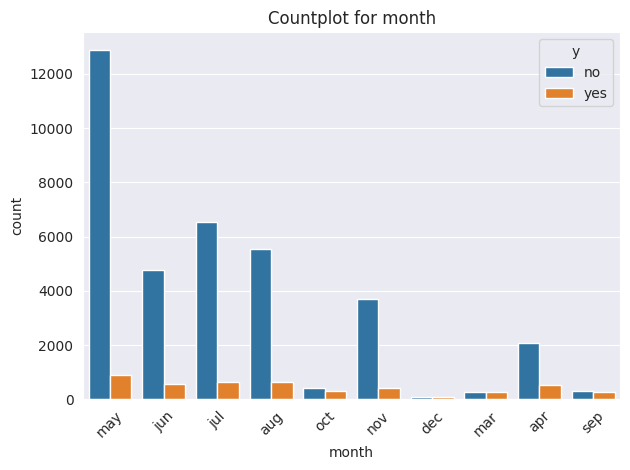

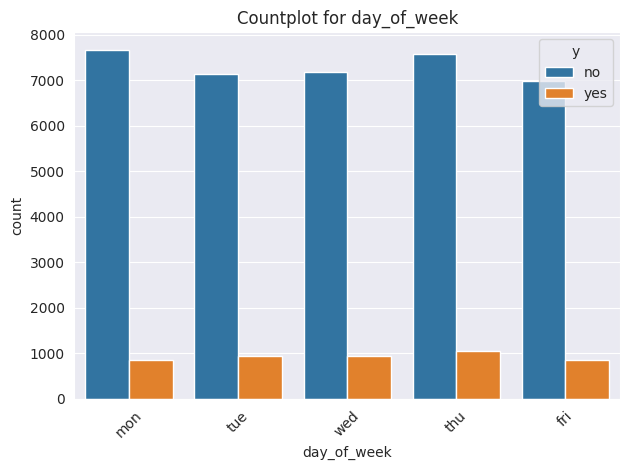

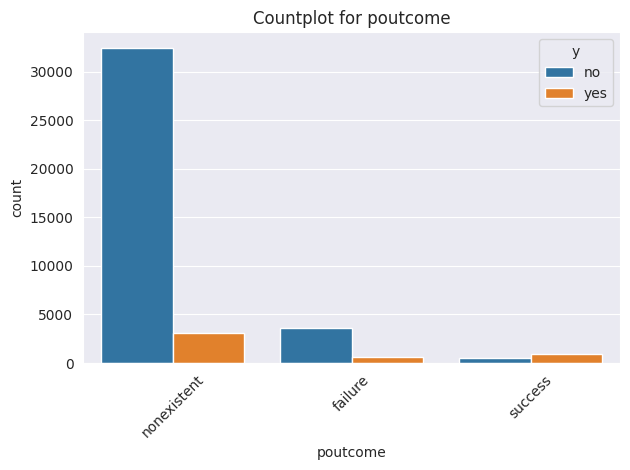

In [19]:
for c in categorical_cols:
  sns.countplot(data=df,x=c,hue='y')
  plt.xticks(rotation=45)
  plt.title(f'Countplot for {c}')
  plt.tight_layout()
  plt.show()

- –≤–∏–¥–Ω–æ, —â–æ –ø–µ—Ä–µ–≤–∞–∂–∞—é—Ç—å –æ–¥—Ä—É–∂–µ–Ω—ñ –∫–ª—ñ—î–Ω—Ç–∏(—Ç—ñ —â–æ –æ—Ñ–æ—Ä–º–∏–ª–∏ –¥–µ–ø–æ–∑–∏—Ç, —ñ —Ç—ñ —â–æ –Ω—ñ)




*   –Ω–∞–π–±—ñ–ª—å—à–µ –∫–ª—ñ—î–Ω—Ç—ñ–≤ –∑ `university.degree`
*   –Ω–µ–≤—ñ–¥–æ–º–æ—ó –∫–∞—Ç–µ–≥–æ—Ä—ñ—ó —Ç—Ä–æ—Ö–∏ —Ç–∞–∫ —î, —Ç–æ–º—É –ª–∏—à–∞—î–º–æ —è–∫ —î - –æ–∫—Ä–µ–º–æ—é –∫–∞—Ç–µ–≥–æ—Ä—ñ—î—é





*   —è–∫—â–æ —î –ø—Ä–æ—Å—Ç—Ä–æ—á–µ–Ω–∏–π –∫—Ä–µ–¥–∏—Ç, —Ç–æ –Ω–µ –±–µ—Ä—É—Ç—å –¥–µ–ø–æ–∑–∏—Ç






* –º–æ–∂–Ω–∞ –ø–æ–º—ñ—Ç–∏—Ç–∏, —â–æ –¥–Ω—ñ —Ç–∏–∂–Ω—è –∫–æ–ª–∏ –ø—Ä–æ—Ö–æ–¥–∏–ª–∞ –∫–∞–º–ø–∞–Ω—ñ—è —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω–∞ —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–æ
* –Ω–∞–π–±—ñ–ª—å—à –∞–∫—Ç–∏–≤–Ω–∏–π –º—ñ—Å—è—Ü—å –±—É–≤ —Ç—Ä–∞–≤–µ–Ω—å


### –ì—ñ–ø–æ—Ç–µ–∑–∏


*   —è–∫ –±—É–ª–æ –≤–∫–∞–∑–∞–Ω–æ –≤ —É–º–æ–≤—ñ `duration` –≤–ø–ª–∏–≤–∞—î –Ω–∞ —Ü—ñ–ª—å–æ–≤—É –∑–º—ñ–Ω–Ω—É, —â–æ –ª–æ–≥—ñ—á–Ω–æ –±–æ —è–∫—â–æ –∫–ª—ñ—î–Ω—Ç –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω–∏–π –≤ –¥–µ–ø–æ–∑–∏—Ç—ñ –±—É–¥–µ –±—ñ–ª—å—à–µ –ø–∏—Ç–∞—Ç–∏
*   —Ç–∞–∫–æ–∂ –Ω–∞ —Ü—ñ–ª—å–æ–≤—É –∑–º—ñ–Ω–Ω—É "–Ω–µ–≥–∞—Ç–∏–≤–Ω–æ" –≤–ª–∏–≤–∞—î `nr.employed`, —á–∏–º –∫—Ä–∞—â–∞ –µ–∫–Ω–æ–º—ñ–∫–∞, —Ç–∏–º –º–µ–Ω—à–µ –ª—é–¥–µ–π —Ö–æ—á–µ –≤—ñ–¥–∫—Ä–∏–≤—Ç–∞–∏ –¥–µ–ø–æ–∑–∏—Ç–∏-–∫—Ä–µ–¥–∏—Ç–∏
*   —Ç–∞–∫–æ–∂ —è–∫—â–æ –∑ –∫–ª—ñ—î–Ω—Ç–æ–º –±—É–≤ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–π —É—Å–ø—ñ—à–Ω–∏–π –¥–æ—Å–≤—ñ–¥ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó, –≤—ñ–Ω –±—ñ–ª—å—à –π–º–æ–≤—ñ—Ä–Ω–æ —ñ —Ü—å–æ–≥–æ —Ä–∞–∑—É "–≤–∫–ª—é—á–∏—Ç—å—Å—è"




# –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—ñ–Ω–≥


### –ü–µ—Ä–µ—Ç–≤–æ—Ä–µ–Ω–Ω—è —Ü—ñ–ª—å–æ–≤–æ—ó –∫–æ–ª–Ω–∫–∏ —É –≤—ñ–¥–ø–æ–≤—ñ–¥–Ω—ñ –∑–Ω–∞—á–µ–Ω–Ω—è

In [20]:
df['target'] = (df["y"] == "yes").astype(int)

In [21]:
df = df.drop('duration',axis=1)

*–≤–∏–∫–∏–¥–∞—é –∑–º—ñ–Ω–Ω—É (–ø–æ—è—Å–Ω–µ–Ω–Ω—è –±—É–ª–æ –≤–∏—â–µ)*

## –∫–æ–¥—É–≤–∞–Ω–Ω—è –∫–æ–ª–æ–Ω–æ–∫

#### `pdays`

In [22]:
df['previous_contact'] = (df["pdays"] != 999).astype(int)

In [27]:
df['pdays'].replace({999:np.nan},inplace=True)

#### `age`

<Axes: xlabel='age', ylabel='Count'>

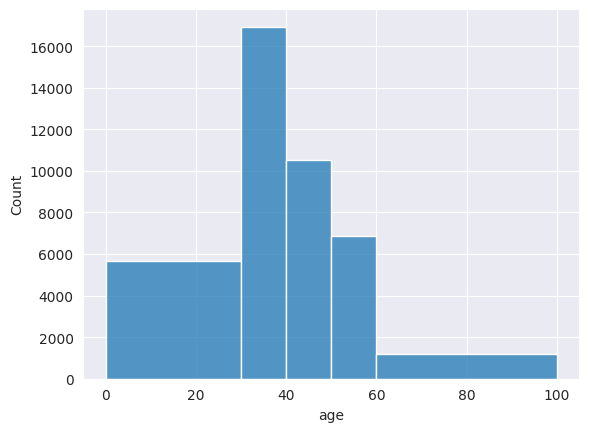

In [50]:
sns.histplot(data=df,x='age',bins=[0,30,40,50,60,100])

In [47]:
df['age_bin'] = pd.cut(df['age'],bins=[0,20,30,40,50,60,100], labels=['20-','21-30','31-40','41-50','51-60','60+'])

In [48]:
df.age_bin.value_counts()

age_bin
31-40    16385
41-50    10240
21-30     7243
51-60     6270
60+        910
20-        140
Name: count, dtype: int64

### –§—ñ–ª—å—Ç—Ä—É—î–º–æ –≤–∏–∫–∏–¥–∏

In [66]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Min_value,Max_value

In [73]:
for c in ['campaign','previous','cons.conf.idx']:
  print(outlier_range(df,c))
  low,up = outlier_range(df,c)
  df[c].clip(lower=low,upper=up,inplace=True)

(np.float64(-2.0), np.float64(6.0))
(np.float64(0.0), np.float64(0.0))
(np.float64(-52.150000000000006), np.float64(-26.949999999999992))


## split data

In [78]:
numeric_cols = [c for c in df.columns if df[c].dtype != 'object' and c!='target'] #–ø–µ—Ä–µ–∑–∞–ø–∏—Å—É—é –∫–æ–ª–æ–Ω–∫–∏ –±–æ –¥–æ–¥–∞–ª–∏—Å—å –Ω–æ–≤—ñ
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' and c!='y']

In [79]:
numeric_cols, categorical_cols

(['age',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'previous_contact',
  'age_bin'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

In [80]:
X = df.drop(['target','y'],axis=1)
Y = df['target']

In [81]:
X.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...    NaN         0  nonexistent          1.1   
1   may         mon  ...    NaN         0  nonexistent          1.1   
2   may         mon  ...    NaN         0  nonexistent          1.1   
3   may         mon  ...    NaN         0  nonexistent          1.1   
4   may         mon  ...    NaN         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  previous_contact  \
0          93.994          -36.4      4.857       5191.0                 0   
1          93.994          -36.4      4.857       5191.0                 0   
2          93.994          -36.4      4.857       5191.0                 0   
3          93.994          -36.4      4.857       5191.0                 0   
4          93.994          -36.4      4.857       5191.0                 0   

   age_bin  
0    51-60  
1    51-60  
2    31-40  
3    31-40  
4    51-60  

[5 rows x 21 columns]

In [82]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [83]:
X_train.shape, X_val.shape, X_test.shape

((28831, 21), (6178, 21), (6179, 21))

## pipeline

In [84]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=True))
])
preprocessor = ColumnTransformer(
    transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# –í–∏–±—ñ—Ä –º–µ—Ç—Ä–∏–∫–∏

–î–ª—è –±—ñ–Ω–∞—Ä–Ω–æ—ó –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó —î –±–∞–≥–∞—Ç–æ –≤–∞—Ä—ñ–∞–Ω—Ç—ñ–≤ –º–µ—Ç—Ä–∏–∫ –¥–ª—è –æ—Ü—ñ–Ω–∫–∏ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª–µ–π:

1. Accuracy - –≤—ñ–¥–ø–∞–¥–∞—î –æ–¥—Ä–∞–∑—É, –±–æ –≤ –Ω–∞—Å –¥—É–∂–µ —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–≤–∞–∂–∞—î –æ–¥–∏–Ω –∫–ª–∞—Å
2. Recall - —è–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–æ –Ω–µ –≤—Ç—Ä–∞—Ç–∏ –ø–æ—Ç–µ–Ω—Ü—ñ–π–Ω–∏—Ö –∫–ª—ñ—î–Ω—Ç—ñ–≤
3. Precision - —è–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–æ –Ω–µ –≤—Ç—Ä–∞—á–∞—Ç–∏ —á–∞—Å –Ω–∞ —Ç–∏—Ö —Ö—Ç–æ —ñ —Ç–∞–∫ –≤—ñ–¥–º–æ–≤–∏—Ç—å—Å—è
4. F1-score - –æ—Å–∫—ñ–ª—å–∫–∏ —Ü–µ –≥–∞—Ä–º–æ–Ω—ñ–π–Ω–µ —Å–µ—Ä–µ–¥–Ω—î –º—ñ–∂ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏ –¥–≤–æ–º–∞, –ø–æ–∫–∞–∂–µ –±–∞–ª–∞–Ω—Å –º—ñ–∂ —Ü–∏–º–∏ —Ç–≤–µ—Ä–¥–∂–µ–Ω–Ω—è–º–∏
5. ROC-AUC - –¥–∞—Å—Ç—å –∑–º–æ–≥—É –∑–∞–≥–∞–ª—å–Ω–æ –æ—Ü—ñ–Ω–∏—Ç–∏ —è–∫—ñ—Å—Ç—å —Ä–æ–±–æ—Ç–∏ –º–æ–¥–µ–ª—ñ , —è–∫ –¥–æ–±—Ä–µ —Ä–æ–∑–¥—ñ–ª—è—î –Ω–∞—à —Ç–∞—Ä–≥–µ—Ç


–ë—É–¥—É –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ –æ—Å—Ç–∞–Ω–Ω—ñ –¥–≤—ñ –¥–ª—è –∫—Ä–∞—â–æ—ó –æ—Ü—ñ–Ω–∫–∏

In [ ]:
def evaluate_model(model, X,y, model_name):
    '''
    calculates the F1-score and ROC-AUC, and plots the ROC curve.
    '''
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1] if hasattr(model, "predict_proba") else None


    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_proba)

    print(f"üîπ {model_name}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC:  {roc_auc:.4f}")

    # ROC-curve
    fpr, tpr, _ = roc_curve(y, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-curve")
    plt.legend()
    plt.show()

    return {"f1_score": f1, "roc_auc": roc_auc}


# Logistic Regression

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [34]:
model_log= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [35]:
param_logistic = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [0, 100]
}

In [37]:
grid_search = GridSearchCV(
    model_log,
    param_logistic,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'contact_encod',
                                                                          'housing_encod',
                                                                          'loan_encod']),
                                                                        ('...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [0, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1', verbose=2)

In [38]:
best_log_param = grid_search.best_params_
best_log_param

{'classifier__C': 100,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [39]:
best_log_model = grid_search.best_estimator_

üîπ Training (Logistic Regression)
F1-score: 0.3395
ROC-AUC:  0.7932


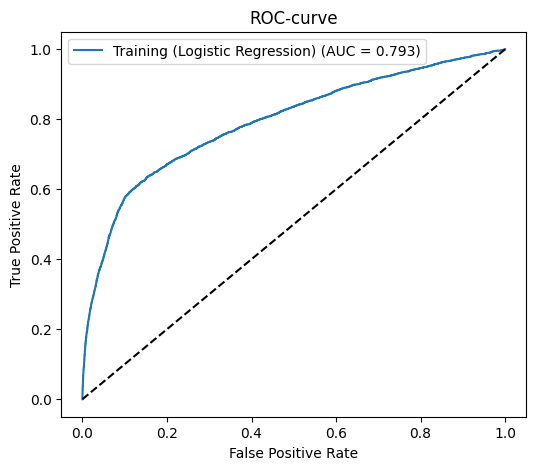

üîπ Testing (Logistic Regression)
F1-score: 0.3374
ROC-AUC:  0.8009


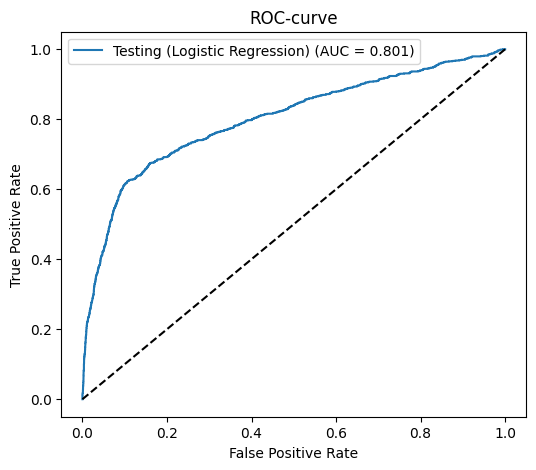

{'f1_score': 0.3374083129584352, 'roc_auc': np.float64(0.800948894995047)}

In [40]:
evaluate_model(best_log_model,X_train,y_train,'Training (Logistic Regression)')
evaluate_model(best_log_model,X_test,y_test,'Testing (Logistic Regression)')

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_knn= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [43]:
params_knn = {
    'classifier__n_neighbors': np.arange(1, 20)}

In [44]:
knn_gs = GridSearchCV(model_knn, params_knn, cv=3,scoring='f1')
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'contact_encod',
                                                                          'housing_encod',
                                                                          'loan_encod']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='f1')

In [45]:
best_knn_param = knn_gs.best_params_
best_knn_param

{'classifier__n_neighbors': np.int64(5)}

In [46]:
best_knn_model = knn_gs.best_estimator_

üîπ Training (KNN)
F1-score: 0.4976
ROC-AUC:  0.9253


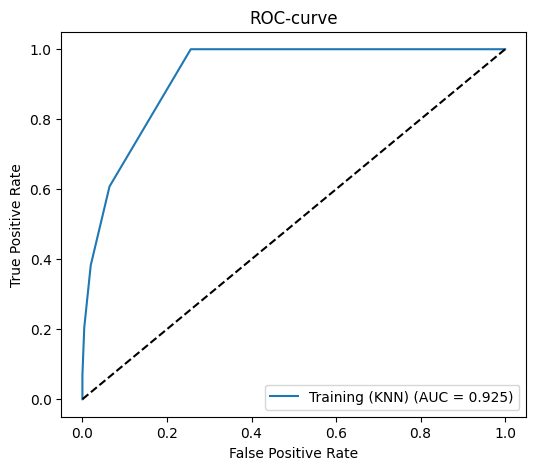

üîπ Testing (KNN)
F1-score: 0.3860
ROC-AUC:  0.7364


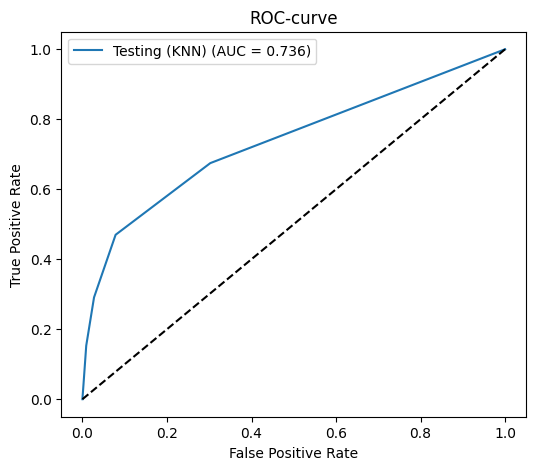

{'f1_score': 0.38598999285203717, 'roc_auc': np.float64(0.7363711142035001)}

In [47]:
evaluate_model(best_knn_model,X_train,y_train,'Training (KNN)')
evaluate_model(best_knn_model,X_test,y_test,'Testing (KNN)')

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model_dt= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [50]:
params_tree = {'classifier__max_depth': np.arange(1, 20,2),
               'classifier__max_leaf_nodes':np.arange(2, 20)}
params_dt = {
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': np.arange(1, 20),
    'classifier__max_leaf_nodes': np.arange(2, 20),
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
}

In [51]:
tree_rs = RandomizedSearchCV(model_dt, params_dt, cv=3,scoring='f1',random_state=42)
tree_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m',
                                                                                'nr.employed',
                                                                                'contact_encod',
                                                                                'housing_encod',
                                                                                'loan_encod...
                                              DecisionTreeClassifier(random_state=42))]),
                   param_distributions={'classifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'classifier__max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4, 8],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10,
                                                                          20],
                                        'classifier__splitter': ['best',
                                                                 'random']},
                   random_state=42, scoring='f1')

In [52]:
best_tree_param = tree_rs.best_params_
best_tree_param

{'classifier__splitter': 'best',
 'classifier__min_samples_split': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__max_leaf_nodes': np.int64(19),
 'classifier__max_depth': np.int64(10)}

In [53]:
best_tree_model = tree_rs.best_estimator_

üîπ Training (Tree)
F1-score: 0.3894
ROC-AUC:  0.7880


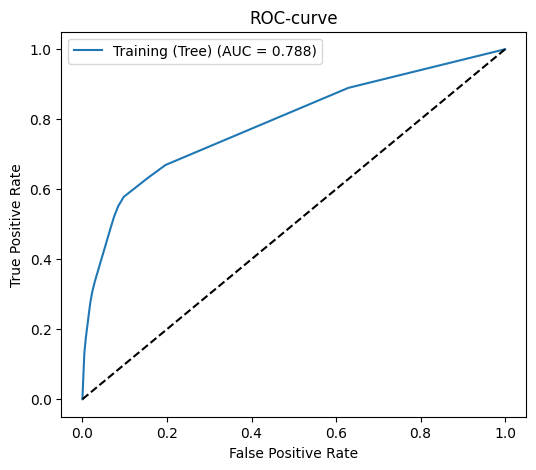

üîπ Testing (Tree)
F1-score: 0.3886
ROC-AUC:  0.7996


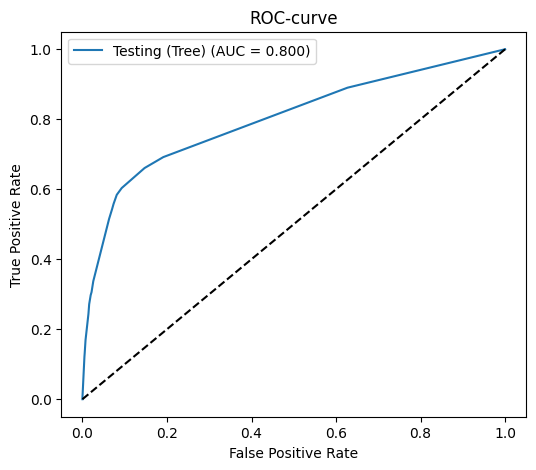

{'f1_score': 0.38858905165767155, 'roc_auc': np.float64(0.7995749357281003)}

In [54]:
evaluate_model(best_tree_model,X_train,y_train,'Training (Tree)')
evaluate_model(best_tree_model,X_test,y_test,'Testing (Tree)')

In [55]:
tree_gs = GridSearchCV(model_dt, params_tree, cv=3,scoring='f1')
tree_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m',
                                                                          'nr.employed',
                                                                          'contact_encod',
                                                                          'housing_encod',
                                                                          'loan_encod']),
                                                                        ('...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'classifier__max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='f1')

In [56]:
best_tree_param_gs = tree_gs.best_params_
best_tree_param_gs

{'classifier__max_depth': np.int64(5),
 'classifier__max_leaf_nodes': np.int64(16)}

üîπ Training (Tree)
F1-score: 0.3825
ROC-AUC:  0.7819


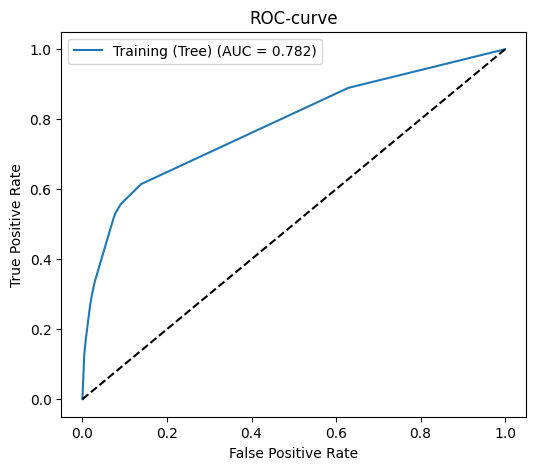

üîπ Testing (Tree)
F1-score: 0.3852
ROC-AUC:  0.7910


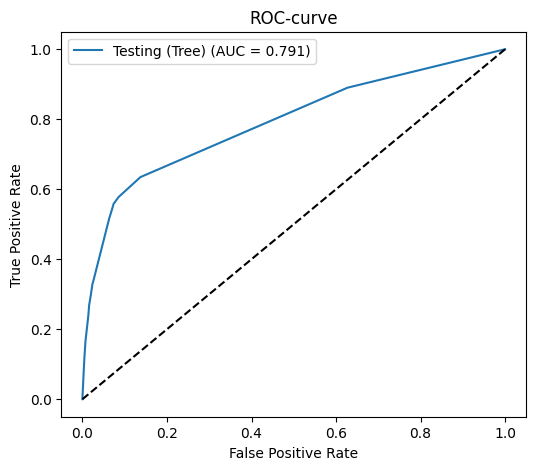

{'f1_score': 0.3851508120649652, 'roc_auc': np.float64(0.7910337751780745)}

In [57]:
best_tree_model_gs = tree_gs.best_estimator_
evaluate_model(best_tree_model_gs,X_train,y_train,'Training (Tree)')
evaluate_model(best_tree_model_gs,X_test,y_test,'Testing (Tree)')

# XGBoost

In [58]:
from xgboost import XGBClassifier

In [59]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import scipy.stats as stats

In [60]:
X_train[categorical_cols] = X_train[categorical_cols].astype('category')
X_test[categorical_cols] = X_test[categorical_cols].astype('category')

## RandomizedSearchCV

In [61]:
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42)

In [62]:
model_xgb= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb)
])

In [63]:
param_xgb_rs = {
    "model__n_estimators": stats.randint(50, 500),
    "model__max_depth": stats.randint(3, 10),
    "model__learning_rate": stats.loguniform(1e-3, 1e-1),
    "model__subsample": stats.uniform(0.5, 0.5),
    "model__colsample_bytree": stats.uniform(0.5, 0.5),
    "model__gamma": stats.loguniform(1e-3, 1.0)
}

In [64]:
search = RandomizedSearchCV(model_xgb,param_distributions=param_xgb_rs,n_iter=30,
    scoring="f1",cv=3,verbose=1,random_state=42,n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:48:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous',
                                                                                'emp.var.rate',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m',
                                                                                'nr.employed',
                                                                                'contact_encod',
                                                                                'housing_encod',
                                                                                'loan_encod...
                                        'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3f6adc4d40>,
                                        'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3f6aedbb90>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b3f689f75f0>,
                                        'model__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b3f689f76e0>},
                   random_state=42, scoring='f1', verbose=1)

In [65]:
best_xgb_rs_param = search.best_params_
best_xgb_rs_param

{'model__colsample_bytree': np.float64(0.7699205456508366),
 'model__gamma': np.float64(0.004066152607618112),
 'model__learning_rate': np.float64(0.07686119654652776),
 'model__max_depth': 9,
 'model__n_estimators': 236,
 'model__subsample': np.float64(0.8473924665198522)}

In [66]:
best_xgb_rs_model = search.best_estimator_

üîπ Training (XGBoost)
F1-score: 0.6932
ROC-AUC:  0.9662


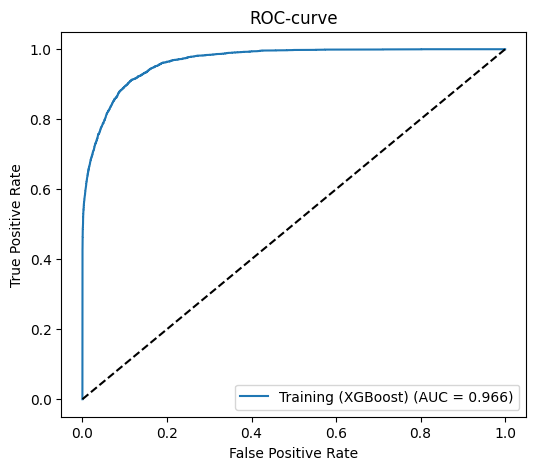

üîπ Testing (XGBoost)
F1-score: 0.4175
ROC-AUC:  0.7993


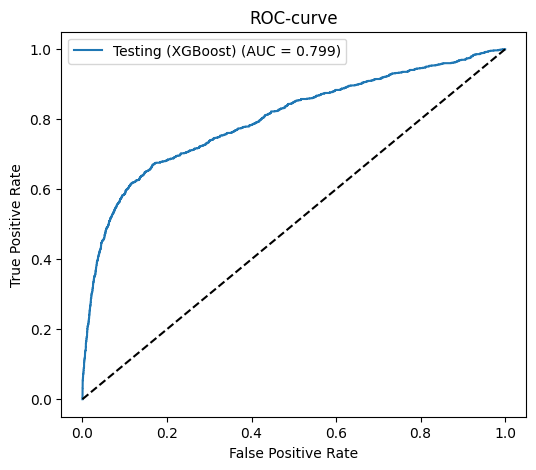

{'f1_score': 0.41750358680057387, 'roc_auc': np.float64(0.799268391197698)}

In [67]:
evaluate_model(best_xgb_rs_model,X_train,y_train,'Training (XGBoost)')
evaluate_model(best_xgb_rs_model,X_test,y_test,'Testing (XGBoost)')

## Hyperopt

In [68]:
def objective(params):
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', XGBClassifier(
                    n_estimators=int(params['n_estimators']),
                    learning_rate=params['learning_rate'],
                    max_depth=int(params['max_depth']),
                    min_child_weight=params['min_child_weight'],
                    subsample=params['subsample'],
                    colsample_bytree=params['colsample_bytree'],
                    gamma=params['gamma'],
                    reg_alpha=params['reg_alpha'],
                    reg_lambda=params['reg_lambda'],
                    enable_categorical=True,
                    use_label_encoder=False,
                    missing=np.nan,
                    eval_metric='auc'))
        ])

    clf.fit(X_train,y_train)

    pred_prob = clf.predict_proba(X_test)
    auroc = roc_auc_score(y_test, pred_prob[:,1])

    return {'loss': -auroc, 'status': STATUS_OK}

In [69]:
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

In [70]:
trials = Trials()
best_hopt = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

best_hopt['n_estimators'] = int(best_hopt['n_estimators'])
best_hopt['max_depth'] = int(best_hopt['max_depth'])
best_hopt['min_child_weight'] = int(best_hopt['min_child_weight'])

  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:48:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



  5%|‚ñå         | 1/20 [00:01<00:22,  1.20s/trial, best loss: -0.7957145679041464]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:48:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 10%|‚ñà         | 2/20 [00:03<00:37,  2.08s/trial, best loss: -0.8004762901551961]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:48:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 15%|‚ñà‚ñå        | 3/20 [00:06<00:40,  2.39s/trial, best loss: -0.8004762901551961]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 20%|‚ñà‚ñà        | 4/20 [00:13<01:03,  3.98s/trial, best loss: -0.8004762901551961]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 25%|‚ñà‚ñà‚ñå       | 5/20 [00:16<00:57,  3.84s/trial, best loss: -0.8004762901551961]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 30%|‚ñà‚ñà‚ñà       | 6/20 [00:17<00:40,  2.92s/trial, best loss: -0.8088556653615737]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 35%|‚ñà‚ñà‚ñà‚ñå      | 7/20 [00:20<00:39,  3.00s/trial, best loss: -0.8088556653615737]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 40%|‚ñà‚ñà‚ñà‚ñà      | 8/20 [00:22<00:32,  2.69s/trial, best loss: -0.8148176211142035]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 9/20 [00:25<00:30,  2.78s/trial, best loss: -0.8148176211142035]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 10/20 [00:27<00:22,  2.25s/trial, best loss: -0.8148176211142035]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 11/20 [00:28<00:17,  1.97s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 12/20 [00:30<00:15,  1.94s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 13/20 [00:33<00:15,  2.21s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 14/20 [00:38<00:18,  3.05s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 15/20 [00:40<00:14,  2.99s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 16/20 [00:44<00:12,  3.23s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 17/20 [00:49<00:11,  3.86s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 18/20 [00:50<00:05,  2.90s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 19/20 [00:53<00:02,  2.88s/trial, best loss: -0.8151650726449361]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20/20 [00:57<00:00,  2.89s/trial, best loss: -0.8151650726449361]


In [71]:
final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',XGBClassifier(
        n_estimators=int(best_hopt['n_estimators']),
        learning_rate=float(best_hopt['learning_rate']),
        max_depth=int(best_hopt['max_depth']),
        min_child_weight=float(best_hopt['min_child_weight']),
        subsample=float(best_hopt['subsample']),
        colsample_bytree=float(best_hopt['colsample_bytree']),
        gamma=float(best_hopt['gamma']),
        reg_alpha=float(best_hopt['reg_alpha']),
        reg_lambda=float(best_hopt['reg_lambda']),
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42,
        n_jobs=-1
    ))
])
final_xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:49:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'contact_encod',
                                                   'housing_encod',
                                                   'loan_encod']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput...
                               gamma=0.25456213037520553, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.02077740506828233, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=6.0,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200, n_jobs=-1,
                               num_parallel_tree=None, ...))])

üîπ Training (XGBoost)
F1-score: 0.3698
ROC-AUC:  0.8194


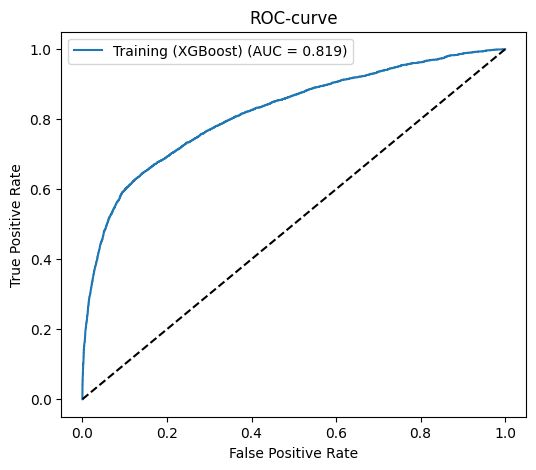

üîπ Testing (XGBoost)
F1-score: 0.3460
ROC-AUC:  0.8163


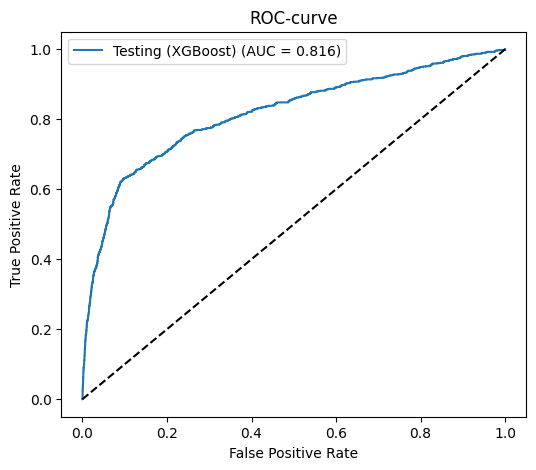

{'f1_score': 0.3459983831851253, 'roc_auc': np.float64(0.8162867352233596)}

In [72]:
evaluate_model(final_xgb_model,X_train,y_train,'Training (XGBoost)')
evaluate_model(final_xgb_model,X_test,y_test,'Testing (XGBoost)')

# –í—ñ—Ç–∞—é –≤–∞—Å –Ω–∞ Mid-term –ø—Ä–æ—î–∫—Ç—ñ!

–¶–µ–π –ø—Ä–æ—î–∫—Ç –ø—Ä–∏–∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è —Ç–æ–≥–æ, —â–æ–± –≤–∏ –º–æ–≥–ª–∏ –æ–Ω–æ–≤–∏—Ç–∏ —Ç–∞ –∑–∞–∫—Ä—ñ–ø–∏—Ç–∏ –∑–Ω–∞–Ω–Ω—è, —è–∫—ñ –≤–∏ –æ—Ç—Ä–∏–º–∞–ª–∏ –∑–∞ –ø–µ—Ä—à—ñ –º—ñ—Å—è—Ü—ñ –Ω–∞–≤—á–∞–Ω–Ω—è –Ω–∞ –∫—É—Ä—Å—ñ "Machine Learning –¥–ª—è –ª—é–¥–µ–π".

### –û—Å–Ω–æ–≤–Ω–∞ –∑–∞–¥–∞—á–∞

–í —Ü—å–æ–º—É –∑–∞–≤–¥–∞–Ω–Ω—ñ –í–∏ - Data Scientist –≤ –±–∞—Ä–Ω–∫—É. –í–∞—à–∞ –∑–∞–¥–∞—á–∞ - –ø–æ–±—É–¥—É–≤–∞—Ç–∏ –º–æ–¥–µ–ª—å –¥–ª—è –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è, —á–∏ –æ—Ñ–æ—Ä–º–∏—Ç—å –∫–ª—ñ—î–Ω—Ç –≤ –±–∞–Ω–∫—É —Å—Ç—Ä–æ–∫–æ–≤–∏–π –¥–µ–ø–æ–∑–∏—Ç (term deposit). –ó –ø–æ–¥—ñ–±–Ω–∏–º–∏ –∑–∞–¥–∞—á–∞–º–∏ –º–∏ —Å—Ç–∏–∫–∞—î–º–æ—Å—å –≤ —Ä—ñ–∑–Ω–∏—Ö –∫–æ–º–ø–∞–Ω—ñ—è—Ö —ñ –¥–æ–º–µ–Ω–∞—Ö, –∫–æ–ª–∏ —Ö–æ—á–µ–º–æ –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —á–∏ –∫–ª—ñ—î–Ω—Ç –∫—É–ø–∏—Ç—å —è–∫–∏–π—Å—å –ø—Ä–æ–¥—É–∫—Ç, —á–∏ –±—É–¥–µ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—Ç–∏—Å—å –Ω–∞—à–∏–º —Å–µ—Ä–≤—ñ—Å–æ–º/—Å–∞–π—Ç–æ–º —É –Ω–∞—Å—Ç—É–ø–Ω–æ–º—É –º—ñ—Å—è—Ü—ñ, —á–∏ –ø—Ä–∏–¥–±–∞—î –ø—ñ–¥–ø–∏—Å–∫—É.

–í–∞–º —Ç—Ä–µ–±–∞ –Ω–µ –ø—Ä–æ—Å—Ç–æ –ø–æ–±—É–¥—É–≤–∞—Ç–∏ –º–æ–¥–µ–ª—å, –∞ —ñ –ø–æ—è—Å–Ω–∏—Ç–∏ –∑–∞–º–æ–≤–Ω–∏–∫—É (–≤–∞—à –∑–∞–º–æ–≤–Ω–∏–∫ —Ç—É—Ç - —Ü–µ –º–∏ –∑ –∫—É—Ä–∞—Ç–æ—Ä–∞–º–∏) —è–∫ –ø—Ä–∞—Ü—é—î —Ü—è –º–æ–¥–µ–ª—å —ñ —á–æ–º—É –≤–æ–Ω–∞ –¥–∞—î —Å–∞–º–µ —Ç–∞–∫—ñ —Ä—ñ—à–µ–Ω–Ω—è. –ë–µ–∑ —Ü—å–æ–≥–æ —Ä–æ–∑—É–º—ñ–Ω–Ω—è –º–∏ –Ω–µ –º–æ–∂–µ–º–æ –ø–µ—Ä–µ–π—Ç–∏ –¥–æ –≤–ø—Ä–æ–≤–∞–∂–¥–µ–Ω–Ω—è (–¥–µ–ø–ª–æ–π–º–µ–Ω—Ç—É) –º–æ–¥–µ–ª—ñ –≤ –ø—Ä–æ–¥–∞–∫—à–µ–Ω.

### –ü—Ä–∞–∫—Ç–∏—á–Ω–µ –∑–∞—Å—Ç–æ–≤—É–≤–∞–Ω–Ω—è

–í —Ä–µ–∞–ª—å–Ω–∏—Ö —Ä–æ–±–æ—á–∏—Ö —É–º–æ–≤–∞—Ö –≤ –ø–æ–¥—ñ–±–Ω–∏—Ö –∑–∞–¥–∞—á–∞—Ö —É –í–∞—Å –¥–∞–Ω—ñ –±—É–¥—É—Ç—å –∑–±–µ—Ä—ñ–≥–∞—Ç–∏—Å—å –≤ –±–∞–∑—ñ –¥–∞–Ω–Ω–∏—Ö –≤ –¥–∏–Ω–∞–º—ñ—Ü—ñ (—Ä—ñ–∑–Ω—ñ –¥—ñ—ó –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤ –∑ –¥–∞—Ç–æ—é —ñ —á–∞—Å–æ–º). –¢—É—Ç –¥–∞–Ω—ñ –≤–∂–µ –∑–∞–≥—Ä–µ–≥–æ–≤–∞–Ω—ñ –ø–æ –∫–ª—ñ—î–Ω—Ç–∞–º —ñ —á–∞—Å—Ç–æ —Å–∞–º–µ –∑ —Ü—å–æ–≥–æ –≤–∏ –±—É–¥–µ—Ç–µ –ø–æ—á–∏–Ω–∞—Ç–∏ –ø–æ–±—É–¥–æ–≤—É –º–æ–¥–µ–ª—ñ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è, –∞–¥–∂–µ —Ü–µ –≤—ñ–¥–Ω–æ—Å–Ω–æ –ø—Ä–æ—Å—Ç–æ —ñ –∑—Ä—É—á–Ω–æ: –∑–∞–≥—Ä–µ–≥—É–≤–∞—Ç–∏ –¥–∞–Ω—ñ –ø–æ –∫–ª—ñ—î–Ω—Ç–∞–º –¥–æ –ø–µ–≤–Ω–æ–≥–æ —á–∞—Å—É —ñ –ø–µ—Ä–µ–¥–±–∞—á–∞—Ç–∏ –≤ –º–∞–π–±—É—Ç–Ω—î (—Ç—ñ–ª—å–∫–∏ –≤ –≤–∏–ø–∞–¥–∫—É —Ç—Ä–µ–Ω—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ ML –Ω–∞—à–µ "–º–∞–π–±—É—Ç–Ω—î" —Ç–µ–∂ —Ñ–∞–∫—Ç–∏—á–Ω–æ –≤ –º–∏–Ω—É–ª–æ–º—É - –±–æ –º–∏ —Ö–æ—á–µ–º–æ –º–∞—Ç–∏ –º—ñ—Ç–∫–∏ –≤ –¥–∞–Ω–∏—Ö, –∞ –æ—Ç –≤–∂–µ –ø—Ä–∏ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—ñ –º–æ–¥–µ–ª—ñ –≤ –ø—Ä–æ–¥–∞–∫—à–µ–Ω—ñ —ñ –±–æ–π–æ–≤–∏—Ö —É–º–æ–≤–∞—Ö –≤–∏ —Å–ø—Ä–∞–≤–¥—ñ –±—É–¥–µ—Ç–µ —Ä–æ–±–∏—Ç–∏ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è –≤ –º–∞–π–±—É—Ç–Ω—î). –¢–æ–∂, —Ä–æ–∑–≤ º—è–∑—É—î–º–æ –∑–∞–¥–∞—á–∫—É!

### –î–∞—Ç–∞—Å–µ—Ç —ñ ML –∑–∞–¥–∞—á–∞

–î–ª—è –≤–∏–∫–æ–Ω–∞–Ω–Ω—è –∑–∞–≤–¥–∞–Ω–Ω—è –º–∏ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—î–º–æ –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö, —è–∫–∏–π –æ—Ä–∏–≥—ñ–Ω–∞–ª—å–Ω–æ –ø–æ—Ö–æ–¥–∏—Ç—å –∑ —Å–∞–π—Ç—É [UCI Machine Learning Repository], –∞–ª–µ —Ç–∞–º –Ω–µ—Ç–æ—á–Ω–∏–π –æ–ø–∏—Å –¥–∞–Ω–∏—Ö —ñ –±–∞–≥–∞—Ç–æ —Ä—ñ–∑–Ω–∏—Ö –ø—ñ–¥–Ω–∞–±–æ—Ä—ñ–≤, —Ç–æ–º—É –º–∏ –±—Ä–∞—Ç–∏–º–µ–º–æ –∑ Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

–¶—ñ –¥–∞–Ω—ñ —Å—Ç–æ—Å—É—é—Ç—å—Å—è –ø—Ä—è–º–∏—Ö –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–∏—Ö –∫–∞–º–ø–∞–Ω—ñ–π (—Ç–µ–ª–µ—Ñ–æ–Ω–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤) –ø–æ—Ä—Ç—É–≥–∞–ª—å—Å—å–∫–æ—ó –±–∞–Ω–∫—ñ–≤—Å—å–∫–æ—ó —É—Å—Ç–∞–Ω–æ–≤–∏. –ö—ñ–Ω—Ü–µ–≤–∞ –º–µ—Ç–∞ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó - –ø–µ—Ä–µ–¥–±–∞—á–∏—Ç–∏, —á–∏ –ø—ñ–¥–ø–∏—à–µ –∫–ª—ñ—î–Ω—Ç —Å—Ç—Ä–æ–∫–æ–≤–∏–π –¥–µ–ø–æ–∑–∏—Ç (–∑–º—ñ–Ω–Ω–∞ y).

–ú–∏ –±—É–¥–µ–º–æ –ø—Ä–∞—Ü—é–≤–∞—Ç–∏ –∑ —Ñ–∞–π–ª–æ–º `bank-additional-full.csv`, —Å–∫–∞—á–∞—Ç–∏ –Ω–∞–±—ñ—Ä –¥–∞–Ω–∏—Ö —Ç—Ä–µ–±–∞ –∑ Kaggle. –ê–±–æ –º–æ–∂–Ω–∞ —Å–∫–∞—á–∞—Ç–∏ —Ü–µ–π —Å–∞–º–∏–π –Ω–∞–±—ñ—Ä –∑ –≥—É–≥–ª –¥–∏—Å–∫–∞ [—Ç—É—Ç](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### –û–ø–∏—Å –∑–º—ñ–Ω–Ω–∏—Ö

–¶–µ–π –æ–ø–∏—Å —î —ñ –Ω–∞ Kaggle, –∞–ª–µ –º–∏ –ø–µ—Ä–µ–∫–ª–∞–ª–∏ –¥–ª—è –≤–∞—à–æ—ó –∑—Ä—É—á–Ω–æ—Å—Ç—ñ —ñ –∞–±–∏ –≤—ñ–Ω –±—É–≤ —É –≤–∞—Å –ø–µ—Ä–µ–¥ –æ—á–∏–º–∞ –ø—ñ–¥ —á–∞—Å —Ä–æ–±–æ—Ç–∏ –Ω–∞–¥ –ø—Ä–æ—î–∫—Ç–æ–º.

#### **–î–∞–Ω—ñ –ø—Ä–æ –∫–ª—ñ—î–Ω—Ç–∞ –±–∞–Ω–∫—É**:
1. **age** ‚Äì –≤—ñ–∫ –∫–ª—ñ—î–Ω—Ç–∞ (—á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
2. **job** ‚Äì –≤–∏–¥ –∑–∞–π–Ω—è—Ç–æ—Å—Ç—ñ (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** ‚Äì —Å—ñ–º–µ–π–Ω–∏–π —Å—Ç–∞–Ω (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `divorced`, `married`, `single`, `unknown`; –ø—Ä–∏–º—ñ—Ç–∫–∞: `divorced` –æ–∑–Ω–∞—á–∞—î —Ä–æ–∑–ª—É—á–µ–Ω–∏–π –∞–±–æ –≤–¥—ñ–≤–µ—Ü—å/–≤–¥–æ–≤–∞).  
4. **education** ‚Äì —Ä—ñ–≤–µ–Ω—å –æ—Å–≤—ñ—Ç–∏ (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** ‚Äì —á–∏ —î —É –∫–ª—ñ—î–Ω—Ç–∞ –ø—Ä–æ—Å—Ç—Ä–æ—á–µ–Ω–∏–π –∫—Ä–µ–¥–∏—Ç? (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `no`, `yes`, `unknown`).  
6. **housing** ‚Äì —á–∏ –º–∞—î –∫–ª—ñ—î–Ω—Ç —ñ–ø–æ—Ç–µ—á–Ω–∏–π –∫—Ä–µ–¥–∏—Ç? (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `no`, `yes`, `unknown`).  
7. **loan** ‚Äì —á–∏ –º–∞—î –∫–ª—ñ—î–Ω—Ç —Å–ø–æ–∂–∏–≤—á–∏–π –∫—Ä–µ–¥–∏—Ç? (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `no`, `yes`, `unknown`).  

#### **–î–∞–Ω—ñ –ø—Ä–æ –æ—Å—Ç–∞–Ω–Ω—ñ–π –∫–æ–Ω—Ç–∞–∫—Ç —É –º–µ–∂–∞—Ö –ø–æ—Ç–æ—á–Ω–æ—ó –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó**:
8. **contact** ‚Äì —Ç–∏–ø –∑–≤‚Äô—è–∑–∫—É –ø—Ä–∏ –æ—Å—Ç–∞–Ω–Ω—å–æ–º—É –∫–æ–Ω—Ç–∞–∫—Ç—ñ (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `cellular`, `telephone`).  
9. **month** ‚Äì –º—ñ—Å—è—Ü—å –æ—Å—Ç–∞–Ω–Ω—å–æ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç—É (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `jan`, `feb`, `mar`, ‚Ä¶, `nov`, `dec`).  
10. **day_of_week** ‚Äì –¥–µ–Ω—å —Ç–∏–∂–Ω—è –æ—Å—Ç–∞–Ω–Ω—å–æ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç—É (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** ‚Äì —Ç—Ä–∏–≤–∞–ª—ñ—Å—Ç—å –æ—Å—Ç–∞–Ω–Ω—å–æ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç—É –≤ —Å–µ–∫—É–Ω–¥–∞—Ö (—á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
   ‚ö† **–í–∞–∂–ª–∏–≤–∞ –ø—Ä–∏–º—ñ—Ç–∫–∞**: —Ü—è –∑–º—ñ–Ω–Ω–∞ –º–∞—î —Å—É—Ç—Ç—î–≤–∏–π –≤–ø–ª–∏–≤ –Ω–∞ —Ü—ñ–ª—å–æ–≤—É –∑–º—ñ–Ω–Ω—É (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, —è–∫—â–æ duration = 0, —Ç–æ y = `no`). –û–¥–Ω–∞–∫ –∑–Ω–∞—á–µ–Ω–Ω—è duration –Ω–µ–≤—ñ–¥–æ–º–µ –¥–æ –∑–¥—ñ–π—Å–Ω–µ–Ω–Ω—è –¥–∑–≤—ñ–Ω–∫–∞. –ö—Ä—ñ–º —Ç–æ–≥–æ, –ø—ñ—Å–ª—è –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –¥–∑–≤—ñ–Ω–∫–∞ –∑–Ω–∞—á–µ–Ω–Ω—è y –≤–∂–µ –≤—ñ–¥–æ–º–µ. –¢–æ–º—É —Ü—é –∑–º—ñ–Ω–Ω—É –≤–∞—Ä—Ç–æ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ –ª–∏—à–µ –¥–ª—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –º–æ–¥–µ–ª–µ–π, –∞–ª–µ –Ω–µ –≤–∫–ª—é—á–∞—Ç–∏ —É —Ñ—ñ–Ω–∞–ª—å–Ω—É –ø–µ—Ä–µ–¥–±–∞—á—É–≤–∞–ª—å–Ω—É –º–æ–¥–µ–ª—å.  

#### **–Ü–Ω—à—ñ –∞—Ç—Ä–∏–±—É—Ç–∏**:
12. **campaign** ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–Ω—Ç–∞–∫—Ç—ñ–≤ —É –º–µ–∂–∞—Ö –ø–æ—Ç–æ—á–Ω–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó –¥–ª—è —Ü—å–æ–≥–æ –∫–ª—ñ—î–Ω—Ç–∞ (—á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞, –≤–∫–ª—é—á–∞—î –æ—Å—Ç–∞–Ω–Ω—ñ–π –∫–æ–Ω—Ç–∞–∫—Ç).  
13. **pdays** ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–Ω—ñ–≤, —â–æ –º–∏–Ω—É–ª–∏ –∑ –º–æ–º–µ–Ω—Ç—É –æ—Å—Ç–∞–Ω–Ω—å–æ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç—É –∫–ª—ñ—î–Ω—Ç–∞ —É –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–π –∫–∞–º–ø–∞–Ω—ñ—ó (—á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞; –∑–Ω–∞—á–µ–Ω–Ω—è 999 –æ–∑–Ω–∞—á–∞—î, —â–æ –∫–ª—ñ—î–Ω—Ç —Ä–∞–Ω—ñ—à–µ –Ω–µ –∫–æ–Ω—Ç–∞–∫—Ç—É–≤–∞–≤—Å—è).  
14. **previous** ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ–Ω—Ç–∞–∫—Ç—ñ–≤, –∑–¥—ñ–π—Å–Ω–µ–Ω–∏—Ö –¥–æ —Ü—ñ—î—ó –∫–∞–º–ø–∞–Ω—ñ—ó –¥–ª—è —Ü—å–æ–≥–æ –∫–ª—ñ—î–Ω—Ç–∞ (—á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
15. **poutcome** ‚Äì —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ—ó –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ—ó –∫–∞–º–ø–∞–Ω—ñ—ó (–∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `failure`, `nonexistent`, `success`).  

#### **–ê—Ç—Ä–∏–±—É—Ç–∏ —Å–æ—Ü—ñ–∞–ª—å–Ω–æ-–µ–∫–æ–Ω–æ–º—ñ—á–Ω–æ–≥–æ –∫–æ–Ω—Ç–µ–∫—Å—Ç—É**:
16. **emp.var.rate** ‚Äì —Ç–µ–º–ø –∑–º—ñ–Ω–∏ –∑–∞–π–Ω—è—Ç–æ—Å—Ç—ñ (—â–æ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
17. **cons.price.idx** ‚Äì —ñ–Ω–¥–µ–∫—Å —Å–ø–æ–∂–∏–≤—á–∏—Ö —Ü—ñ–Ω (—â–æ–º—ñ—Å—è—á–Ω–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
18. **cons.conf.idx** ‚Äì —ñ–Ω–¥–µ–∫—Å –¥–æ–≤—ñ—Ä–∏ —Å–ø–æ–∂–∏–≤–∞—á—ñ–≤ (—â–æ–º—ñ—Å—è—á–Ω–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
19. **euribor3m** ‚Äì —Å—Ç–∞–≤–∫–∞ Euribor –Ω–∞ 3 –º—ñ—Å—è—Ü—ñ (—â–æ–¥–µ–Ω–Ω–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  
20. **nr.employed** ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø—Ä–∞—Ü–µ–≤–ª–∞—à—Ç–æ–≤–∞–Ω–∏—Ö –æ—Å—ñ–± (—â–æ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫, —á–∏—Å–ª–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞).  

#### **–¶—ñ–ª—å–æ–≤–∞ –∑–º—ñ–Ω–Ω–∞**:
21. **y** ‚Äì —á–∏ –ø—ñ–¥–ø–∏—Å–∞–≤ –∫–ª—ñ—î–Ω—Ç —Å—Ç—Ä–æ–∫–æ–≤–∏–π –¥–µ–ø–æ–∑–∏—Ç? (–±—ñ–Ω–∞—Ä–Ω–∞ –∑–º—ñ–Ω–Ω–∞: `yes`, `no`).

### –í–∞—à–µ –∑–∞–≤–¥–∞–Ω–Ω—è –Ω–∞ —Ü–µ–π –ø—Ä–æ—î–∫—Ç

–ù–µ–æ–±—Ö—ñ–¥–Ω–æ –ø–æ–±—É–¥—É–≤–∞—Ç–∏ —Ä—ñ—à–µ–Ω–Ω—è —Ü—ñ—î—ó –∑–∞–¥–∞—á—ñ –±—ñ–Ω–∞—Ä–Ω–æ—ó –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó. –î–ª—è —Ü—å–æ–≥–æ

1. –ü—Ä–æ–≤–µ—Å—Ç–∏ Exploratory Data Analysis —ñ –≤–∏—Å—É–Ω—É—Ç–∏ –≥—ñ–ø–æ—Ç–µ–∑–∏ —â–æ–¥–æ –≤–ø–ª–∏–≤—É –æ–∫—Ä–µ–º–∏—Ö –æ–∑–Ω–∞–∫ –Ω–∞ —Ü—ñ–ª—å–æ–≤—É –æ–∑–Ω–∞–∫—É `y`.

2. –û–ø–∏—Å–∞—Ç–∏, —è–∫—ñ –º–µ—Ç–æ–¥–∏ –≤–∏ –≤–≤–∞–∂–∞—î—Ç–µ –¥–æ—Ä–µ—á–Ω–∏–º –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ —ñ –æ–±—Ä–∞—Ç–∏ –º–µ—Ç—Ä–∏–∫—É –æ—Ü—ñ–Ω–∫–∏ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª–µ–π (–º–µ—Ç—Ä–∏–∫—É —Ç—Ä–µ–±–∞ –æ–±“ë—Ä—É–Ω—Ç—É–≤–∞—Ç–∏).

3. –ü—Ä–æ–≤–µ—Å—Ç–∏ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –¥–∞–Ω–∏—Ö –¥–ª—è –ø–æ–¥–∞–ª—å—à–æ—ó —ó—Ö –ø–µ—Ä–µ–¥–∞—á—ñ –≤ –º–æ–¥–µ–ª—å. –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –º–∞—î –≤–∫–ª—é—á–∞—Ç–∏
  - –æ–±—Ä–æ–±–∫—É –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö (—è–∫—â–æ —Ü—å–æ–≥–æ –ø–æ—Ç—Ä–µ–±—É—î –º–æ–¥–µ–ª—å)
  - –≥—Ä—É–ø—É–≤–∞–Ω–Ω—è –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –≤ –∫–∞—Ç–µ–≥–æ—Ä—ñ–∞–ª—å–Ω–∏—Ö –∑–º—ñ–Ω–Ω–∏—Ö, —è–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–æ
  - –∑–∞–ø–æ–≤–Ω–µ–Ω–Ω—è –ø—Ä–æ–ø—É—â–µ–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å, —è–∫—â–æ —Ç–∞–∫—ñ —î
  - –≤–∏—è–≤–ª–µ–Ω–Ω—è outliers —ñ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å, —â–æ –∑ –Ω–∏–º–∏ —Ä–æ–±–∏—Ç–∏
  - —Å—Ç–≤–æ—Ä–µ–Ω–Ω—è –¥–æ–¥–∞—Ç–∫–æ–≤–∏—Ö –æ–∑–Ω–∞–∫, —è–∫—ñ –Ω–∞ –≤–∞—à –ø–æ–≥–ª—è–¥ –ø–æ–ª—ñ–ø—à–∞—Ç—å —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª–µ–π ML.

4. –ù–∞—Ç—Ä–µ–Ω—É–≤–∞—Ç–∏ 4 —Ä—ñ–∑–Ω—ñ —Ç–∏–ø–∏ –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –Ω–∞–≤—á–∞–Ω–Ω—è, –∑ —è–∫–∏—Ö –æ–±–æ–≤ º—è–∑–∫–æ–≤–æ
  - Logistic Regression
  - kNN
  - Decision Tree
  - –ü—Ä–∏–Ω–∞–π–º–Ω—ñ –æ–¥–∏–Ω –∑ –∞–ª–≥–æ—Ä–∏—Ç–º—ñ–≤ –±—É—Å—Ç–∏–Ω–≥—É

5. –°—Ç–≤–æ—Ä–∏—Ç–∏ —Ç–∞–±–ª–∏—Ü—é –∑ –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è–º —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª–µ–π (–≤ Google Spreadsheets –∞–±–æ –ø—Ä—è–º–æ –≤ Jupyter Notebook), –¥–µ –∑–∞–∑–Ω–∞—á–∏—Ç–∏
  - –Ω–∞–∑–≤—É –º–æ–¥–µ–ª—ñ
  - –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏
  - –º–µ—Ç—Ä–∏–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ
  - –º–µ—Ç—Ä–∏–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä—ñ –¥–∞–Ω–∏—Ö
  - –∫–æ–º–µ–Ω—Ç–∞—Ä –¥–æ –º–æ–¥–µ–ª—ñ - —Ö–æ—Ä–æ—à–∞ –≤–æ–Ω–∞, —á–∏ –Ω—ñ, —á–∏ –≤–∞—Ä—Ç–æ —ó—ó –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ —á–∏ –Ω—ñ, —á–∏ —î —É –≤–∞—Å –ø–æ–¥–∞–ª—å—à—ñ —ñ–¥–µ—ó —â–æ–¥–æ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ –∑ —Ü—ñ—î—é –º–æ–¥–µ–ª–ª—é?

6. –î–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º—É –±—É—Å—Ç–∏–Ω–≥—É –≤–∏–∫–æ–Ω–∞—Ç–∏ –ø—Ä–æ—Ü–µ–¥—É—Ä—É —Ç—é–Ω–∏–Ω–≥—É –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–≤–æ–º–∞ —Å–ø–æ—Å–æ–±–∞–º–∏
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  –í–∏—è–≤–∏—Ç–∏ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ —ñ –∑—Ä–æ–±–∏—Ç–∏ –≤–∏—Å–Ω–æ–≤–∫–∏ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ –≤ –∫–æ–∂–Ω–æ–º—É –∑ –≤–∏–ø–∞–¥–∫—ñ–≤.

7. –í–∏–≤–µ—Å—Ç–∏ –≤–∞–∂–ª–∏–≤—ñ—Å—Ç—å –æ–∑–Ω–∞–∫ –¥–ª—è –º–æ–¥–µ–ª—ñ, —è–∫—ñ –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±–µ –Ω–∞–π–∫—Ä–∞—â–µ —ñ –æ–ø–∏—Å–∞—Ç–∏, —á–∏ –≤–≤–∞–∂–∞—î—Ç–µ –≤–∏ —Å–∞–º–µ —Ç–∞–∫–∏–π –ø—Ä—ñ–æ—Ä–∏—Ç–µ—Ç –≤–∞–∂–ª–∏–≤–æ—Å—Ç—ñ –æ–∑–Ω–∞–∫ –∞–¥–µ–∫–≤–∞—Ç–Ω–∏–º –∑ —Ç–æ—á–∫–∏ –∑–æ—Ä—É common sense?

8. –î–ª—è –Ω–∞–π–∫—Ä–∞—â–æ—ó –ø—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª—ñ–∑ –≤–ø–ª–∏–≤—É –æ–∑–Ω–∞–∫ –Ω–∞ –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω–Ω—è –∑ –¥–æ–ø–æ–º–æ–≥–æ—é –±—ñ–±–ª—ñ–æ—Ç–µ–∫–∏ SHAP.

9. –ü—Ä–æ–≤–µ—Å—Ç–∏ –∞–Ω–∞–ª—ñ–∑ –∑–∞–ø–∏—Å—ñ–≤, –≤ —è–∫–∏—Ö –º–æ–¥–µ–ª—å –ø–æ–º–∏–ª—è—î—Ç—å—Å—è —ñ –Ω–∞ –æ—Å–Ω–æ–≤—ñ –Ω—å–æ–≥–æ –∑–∞–∑–Ω–∞—á–∏—Ç–∏, —è–∫–∏–º —á–∏–Ω–æ–º –º–æ–∂–Ω–∞ –ø–æ–ª—ñ–ø—à–∏—Ç–∏ –Ω–∞—è–≤–Ω–µ —Ä—ñ—à–µ–Ω–Ω—è –∞–±–∏ —É–Ω–∏–∫–∞—Ç–∏ –Ω–∞—è–≤–Ω–∏—Ö –ø–æ–º–∏–ª–æ–∫?


### –†–µ–∑—É–ª—å—Ç–∞—Ç –≤–∏–∫–æ–Ω–∞–Ω–Ω—è –ø—Ä–æ—î–∫—Ç—É

–†–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –≤–∏–∫–æ–Ω–∞–Ω–Ω—è —Ü—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è —î –æ–∫—Ä–µ–º–∏–π github —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä—ñ–π –∑ –æ—Ö–∞–π–Ω–æ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–º Jupyter Notebook, —á–∞—Å—Ç–∏–Ω–∞ –∫–æ–¥—É –º–æ–∂–µ –±—É—Ç–∏ –≤–∏–Ω–µ—Å–µ–Ω–∞ –≤ .py —Ñ–∞–π–ª–∏. –†–µ–ø–æ–∑–∏—Ç–æ—Ä—ñ–π –º–∞—î –º—ñ—Å—Ç–∏—Ç–∏ –æ–ø–∏—Å –∑–∞–¥–∞—á—ñ, –æ–ø–∏—Å —â–æ –±—É–ª–æ –∑—Ä–æ–±–ª–µ–Ω–æ —ñ —è–∫—ñ –º–æ–¥–µ–ª—ñ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–æ, —Ç–∞–±–ª–∏—Ü—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ (–º–æ–∂–Ω–∞ —Å–∫—Ä—ñ–Ω—à–æ—Ç–æ–º –∞–±–æ —Å—Ç–≤–æ—Ä–∏—Ç–∏ —Ç–∞–±–ª–∏—Ü—é –≤ Markdown —Ñ–æ—Ä–º–∞—Ç—ñ - –¥–∏–≤. –ü—Ä–∏–∫–ª–∞–¥) —ñ –≤–∏—Å–Ω–æ–≤–∫–∏, —â–æ –í–∏ –¥–æ—Å—è–≥–ª–∏ —ñ —â–æ –º–æ–∂–Ω–∞ –±—É–ª–æ –± —â–µ –∑—Ä–æ–±–∏—Ç–∏ –¥–ª—è –ø–æ–ª—ñ–ø—à–µ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤.


### –ü—Ä–∏–∫–ª–∞–¥ –ø—Ä–æ—î–∫—Ç—É

–î–ª—è –Ω–∞—Ç—Ö–Ω–µ–Ω–Ω—è –≤–∏ –º–æ–∂–µ—Ç–µ –æ–∑–Ω–∞–π–æ–º–∏—Ç–∏—Å—å –∑ –ø—Ä–æ—î–∫—Ç–æ–º, –ø–æ–±—É–¥–æ–≤–∞–Ω–∏–º –Ω–∞ –æ—Å–Ω–æ–≤—ñ —Ü–∏—Ö –¥–∞–Ω–∏—Ö –∑–∞ [—Ü–∏–º –ø–æ—Å–∏–ª–∞–Ω–Ω—è–º](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [73]:
best_log_param

{'classifier__C': 100,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [81]:
comp_data = {
    'Model':['Logistic Regression','KNN','Decision Tree','XGBoost:RandomizedSearchCV','XGBoost:Hyperopt'],
    'Hyperparams':[best_log_param,best_knn_param,best_tree_param, best_xgb_rs_param,best_hopt],
    'ROC-curve on Train':[0.7932,0.9253,0.7880,0.9662,0.8194],
    'ROC-curve on Test':[0.8009,0.7364,0.7996,0.7993,0.8163]
}
comp_df = pd.DataFrame(comp_data)

In [82]:
comp_df

Model  \
0         Logistic Regression   
1                         KNN   
2               Decision Tree   
3  XGBoost:RandomizedSearchCV   
4            XGBoost:Hyperopt   

                                         Hyperparams  ROC-curve on Train  \
0  {'classifier__C': 100, 'classifier__max_iter':...              0.7932   
1                     {'classifier__n_neighbors': 5}              0.9253   
2  {'classifier__splitter': 'best', 'classifier__...              0.7880   
3  {'model__colsample_bytree': 0.7699205456508366...              0.9662   
4  {'colsample_bytree': 0.6568186973864494, 'gamm...              0.8194   

   ROC-curve on Test  
0             0.8009  
1             0.7364  
2             0.7996  
3             0.7993  
4             0.8163

**–∫–æ–º–µ–Ω—Ç–∞—Ä –¥–æ –º–æ–¥–µ–ª—ñ - —Ö–æ—Ä–æ—à–∞ –≤–æ–Ω–∞, —á–∏ –Ω—ñ, —á–∏ –≤–∞—Ä—Ç–æ —ó—ó –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ —á–∏ –Ω—ñ, —á–∏ —î —É –≤–∞—Å –ø–æ–¥–∞–ª—å—à—ñ —ñ–¥–µ—ó —â–æ–¥–æ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ –∑ —Ü—ñ—î—é –º–æ–¥–µ–ª–ª—é?**

In [84]:
?final_xgb_model

In [91]:
xgb_model = final_xgb_model.named_steps["model"]
feature_names = final_xgb_model.named_steps["preprocessor"].get_feature_names_out()
importances = xgb_model.feature_importances_

# —Ä–æ–±–∏–º–æ —Ç–∞–±–ª–∏—á–∫—É
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(10)

feature  importance
8        num__nr.employed    0.350563
4       num__emp.var.rate    0.071382
56  cat__poutcome_success    0.067743
2              num__pdays    0.056666
7          num__euribor3m    0.049428
6      num__cons.conf.idx    0.036469
44         cat__month_mar    0.029661
47         cat__month_oct    0.025834
45         cat__month_may    0.023830
5     num__cons.price.idx    0.019500

#WAY 2

In [92]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [94]:
df.shape

(41188, 21)

In [95]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## eda 2

In [96]:
df.isna().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [99]:
cat_cols_raw = [c for c in df.columns if df[c].dtype == 'object' and c != 'y']
for c in cat_cols_raw:
  vals = df[c].value_counts(dropna=False)
  print(f"\n[{c}] {len(vals)} –∫–∞—Ç–µ–≥–æ—Ä—ñ–π")
  print(vals.head(20))


[job] 12 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

[marital] 4 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

[education] 8 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

[default] 3 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

[housing] 3 –∫–∞—Ç–µ–≥–æ—Ä—ñ–π
housing
yes        21576
no         18622
unknown      990
Name: count, dtyp

In [100]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

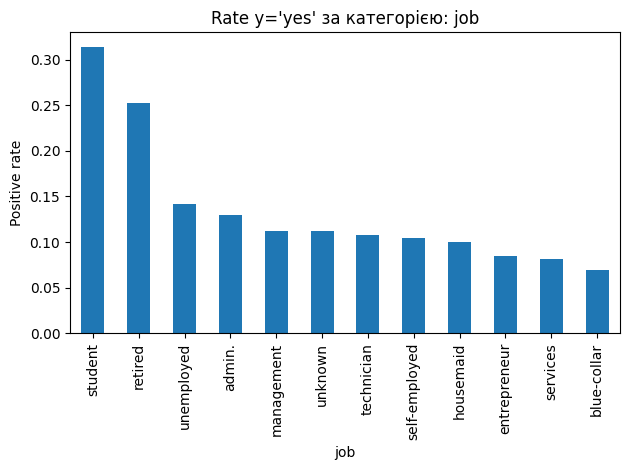

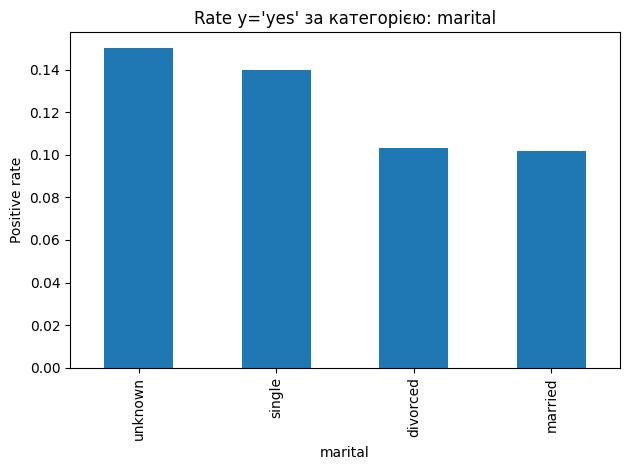

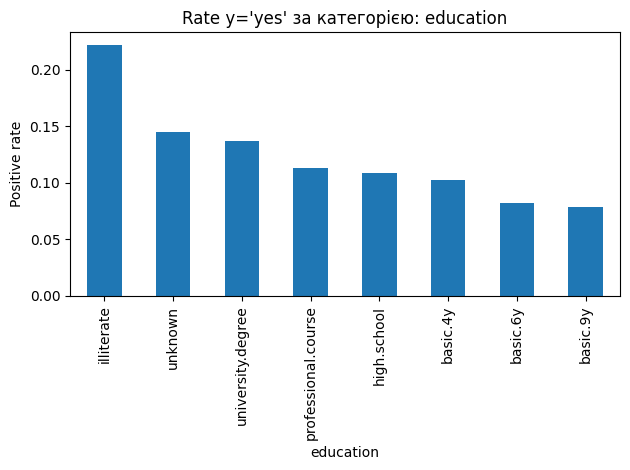

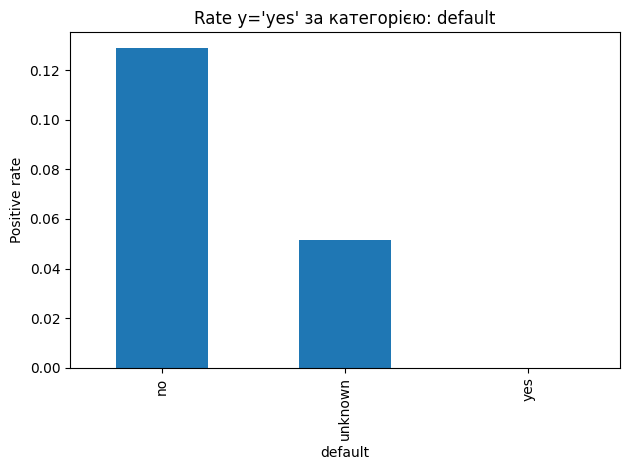

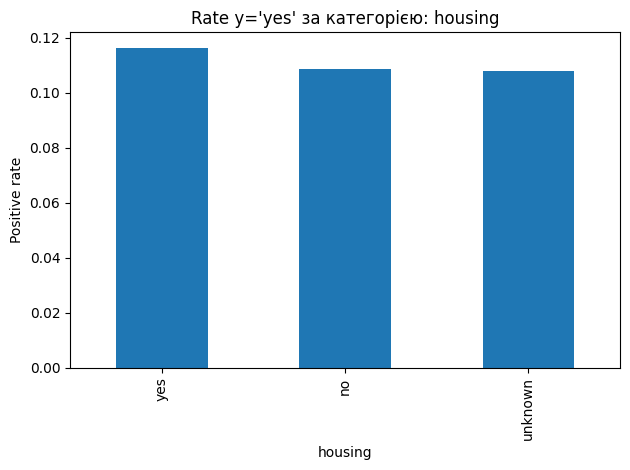

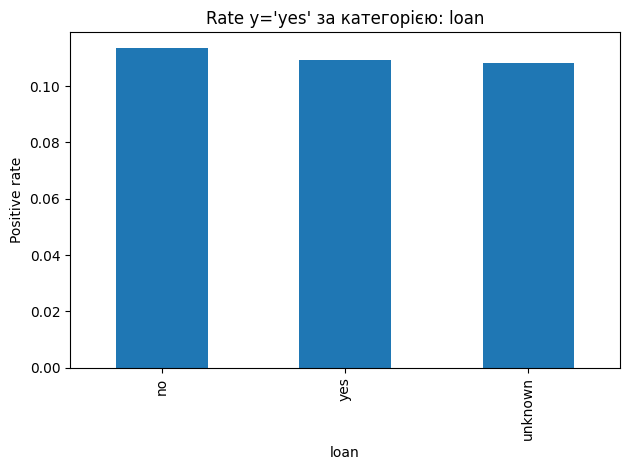

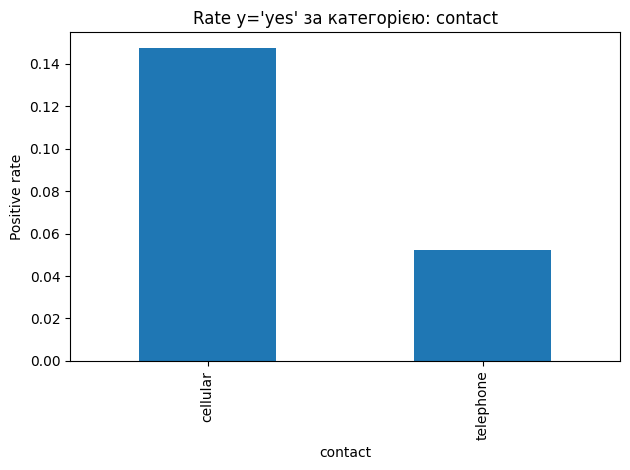

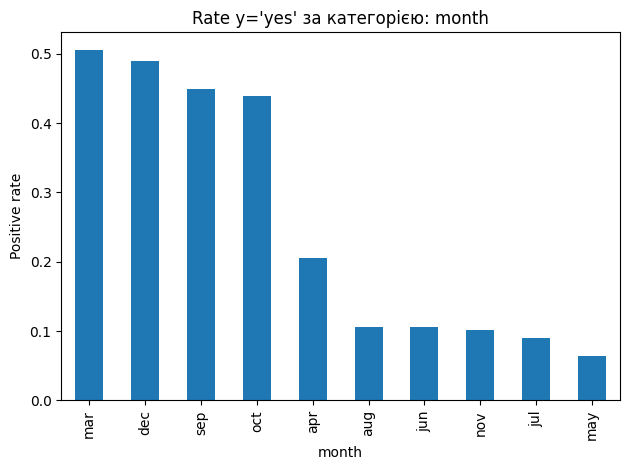

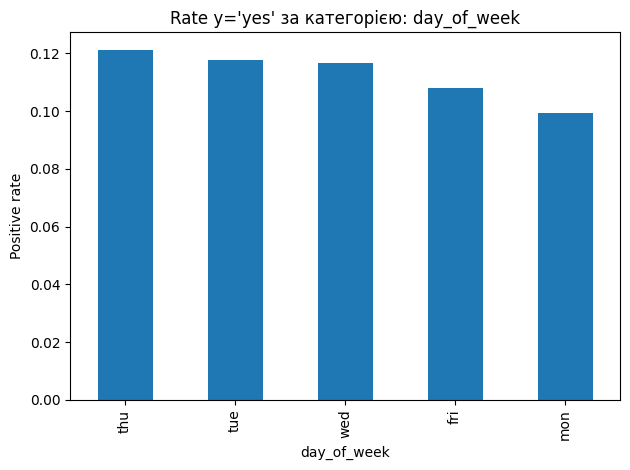

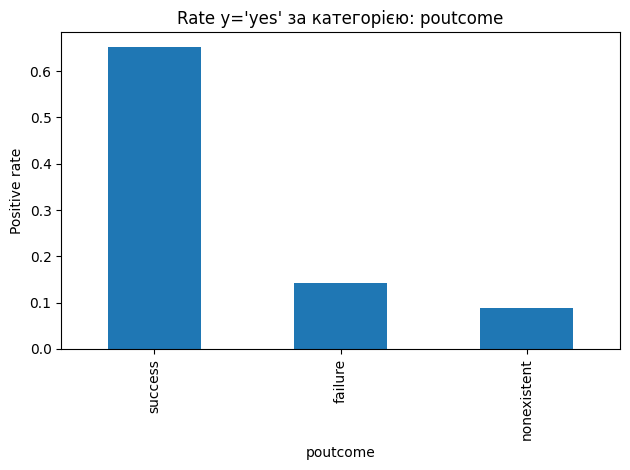

In [101]:
def plot_rate_by_category(df: pd.DataFrame, col: str):
  tmp = (df.groupby(col)['y']
  .apply(lambda s: (s == 'yes').mean())
  .sort_values(ascending=False))
  tmp.plot(kind='bar')
  plt.title(f"Rate y='yes' –∑–∞ –∫–∞—Ç–µ–≥–æ—Ä—ñ—î—é: {col}")
  plt.ylabel('Positive rate')
  plt.tight_layout()
  plt.show()

for c in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
  if c in df.columns:
    plot_rate_by_category(df, c)

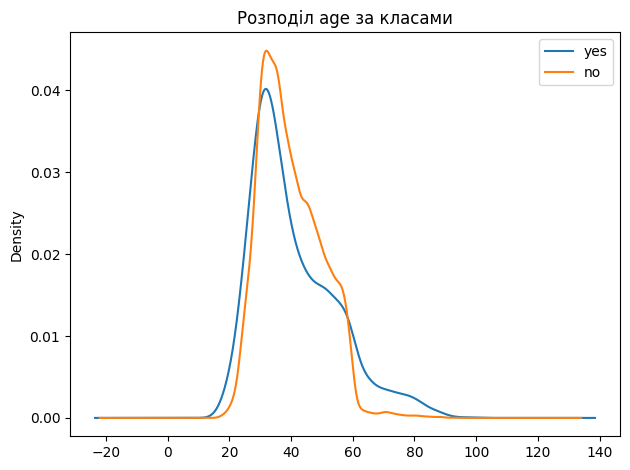

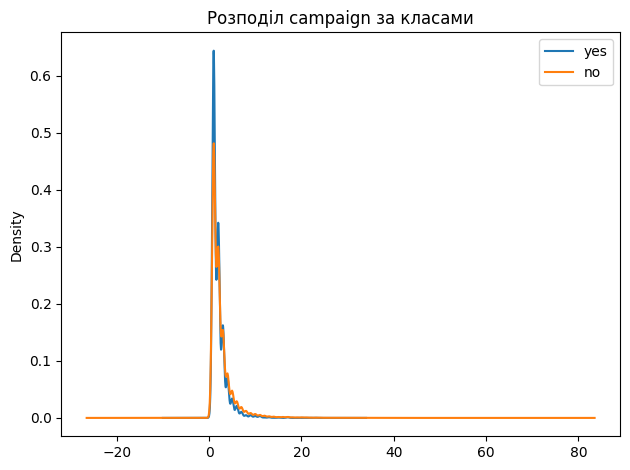

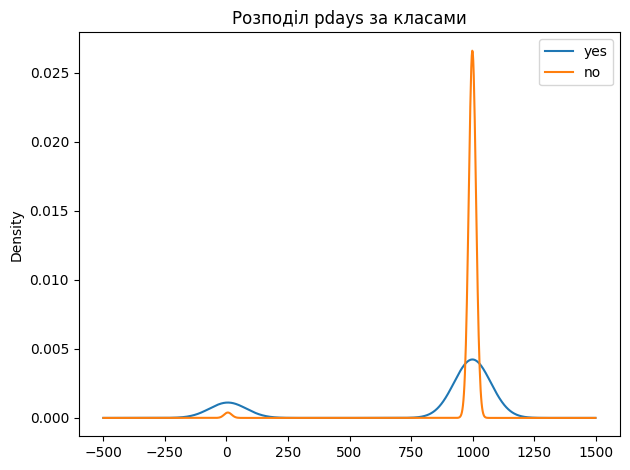

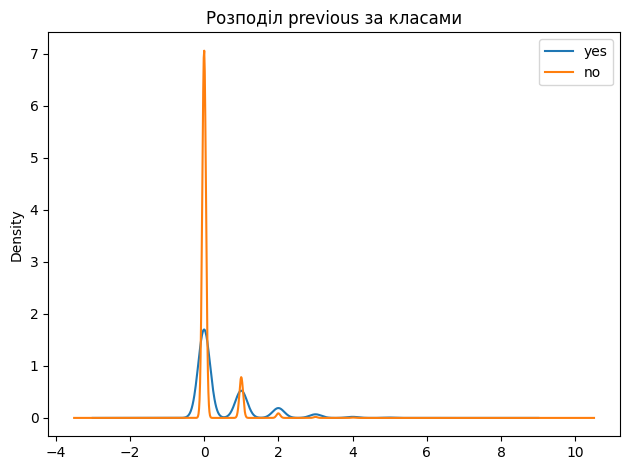

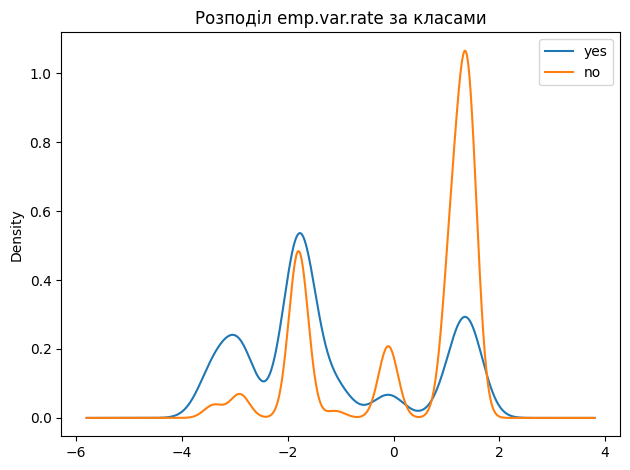

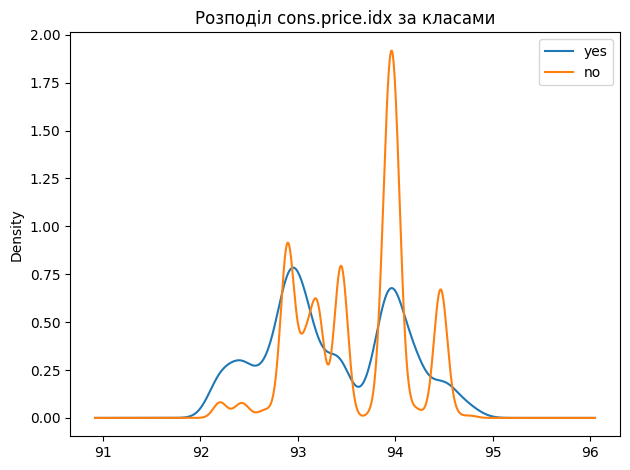

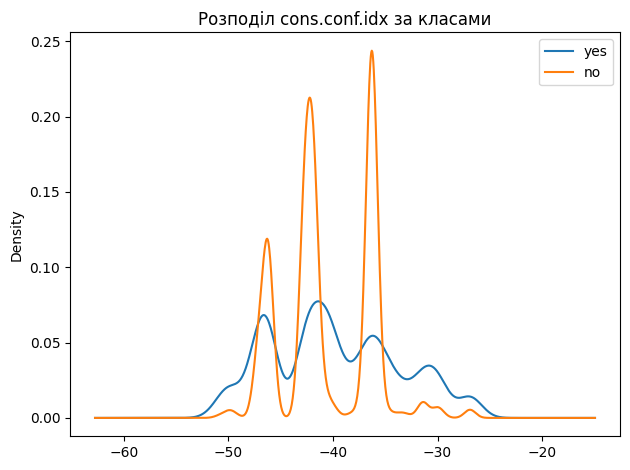

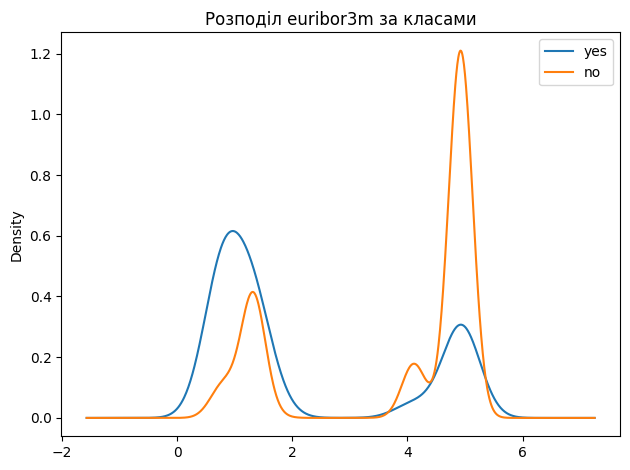

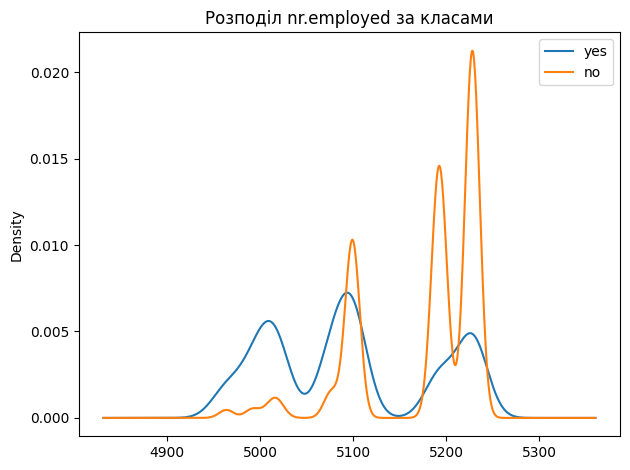

In [102]:
num_cols_raw = [c for c in df.columns if df[c].dtype != 'object' and c != 'duration']
for c in num_cols_raw:
  df_yes = df[df['y']=='yes'][c]
  df_no = df[df['y']=='no'][c]
  df_yes.plot(kind='kde', label='yes')
  df_no.plot(kind='kde', label='no')
  plt.title(f"–†–æ–∑–ø–æ–¥—ñ–ª {c} –∑–∞ –∫–ª–∞—Å–∞–º–∏")
  plt.legend()
  plt.tight_layout()
  plt.show()

## preprocesiing 2